In [417]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time
import os

Define functions:


In [418]:
#def cT1_func(s, a, b, c, d, e ,f, g, h):
    #return np.exp(-a * s) + b / (1 + np.exp(-c * (s - d))) + e * s + f + g * s**2 + h * np.exp(-s)
def cT1_func(s, a, b, c, d):
    return a * s**3 + b * s**2 + c * s + d

In [419]:
#def cT2_func(s, a, b, c, d):
    #return a * s**3 + b * s**2 + c * s + d
def cT2_func(s, a, b, c, d, e, f, g):
    return (a / (1 + np.exp(-b * (s - c)))) + (d * s) + e + (f * s**2) + (g * s**3)

In [420]:
def cT3_func(s, a, b, c, d, e, f, g):
    return (a * np.exp(-b * s)) + (c / (1 + np.exp(-d * (s - e)))) + (f * s) + g

In [421]:
def cT4_func(s, a, b, c, d, e, f, g):
    return (a * s**2 + b * s + c) + (d * np.exp(-e * (s - f)**2)) + (g * s)

In [422]:
def cT5_func(s, a, b, c):
    return a * np.exp(-b * s) + c

In [423]:
def cT6_func(s, a, b, c, d):
    return a * s**3 + b * s**2 + c * s + d 

Load data for StrRt0.0001

In [424]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.0001.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)


Visualize the data

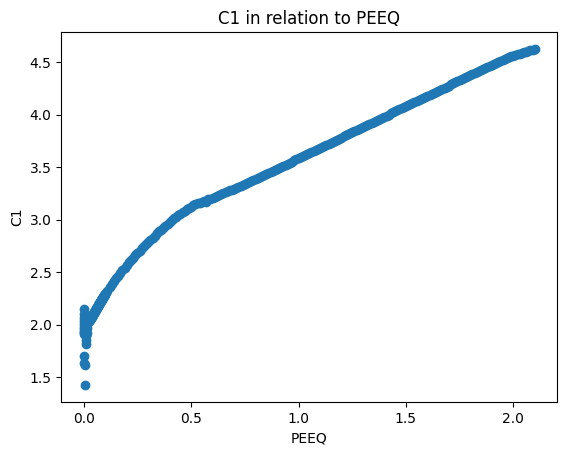

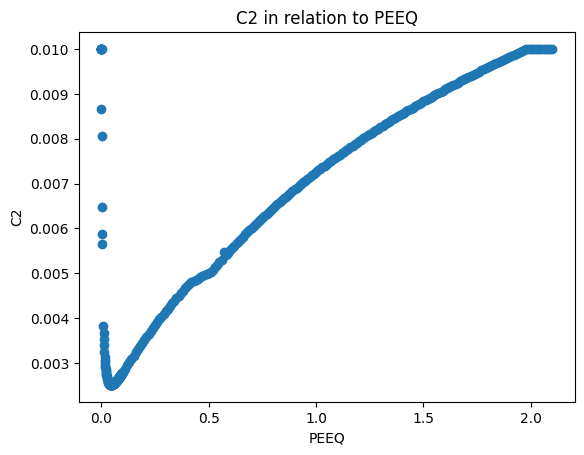

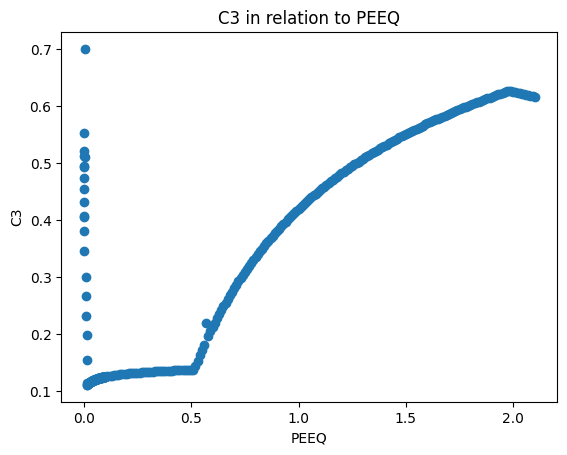

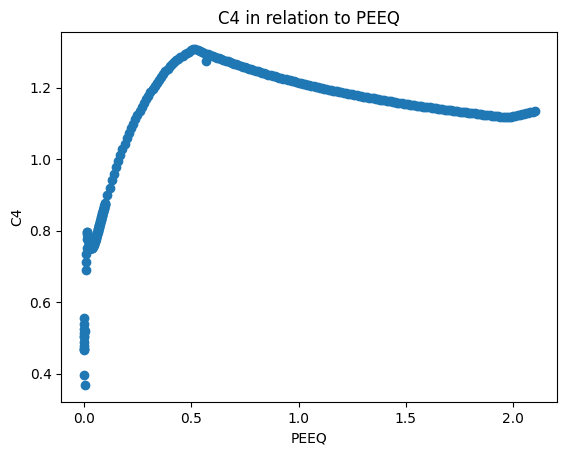

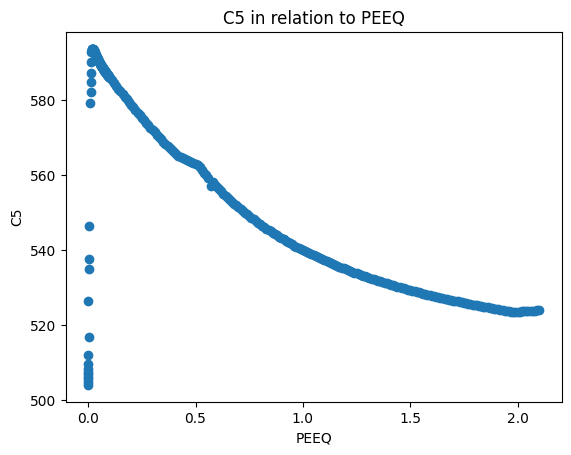

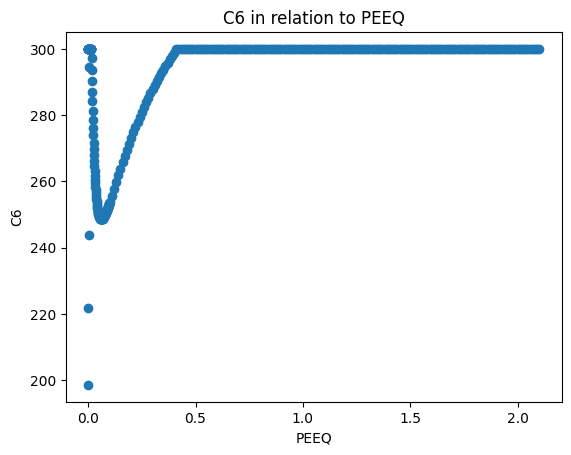

In [425]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()

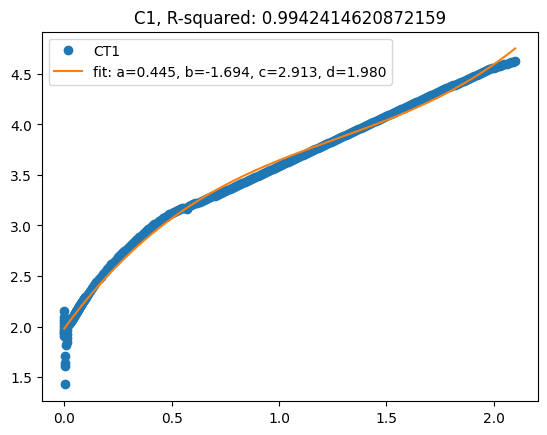

In [426]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
#initial_guess = [1.369, 5.312, 4.964, -0.218, 2.677, -5.0, -0.359, 1.942]
#param_bounds = ([0.1, 0, 0.1, -1, 0, -10, -1, 0], [10, 10, 20, 1, 10, 0, 1, 10])
initial_guess = [0.1, 0.1, 0.1, 1.5]
param_bounds = ([-10, -10, -10, 1], [10, 10, 10, 5])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guess, bounds=param_bounds, maxfev = 1000000)
#[a, b, c, d, e, f, g ,h] = params
#para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)
[a, b, c, d] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
residuals = cT1 - cT1_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C1, R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

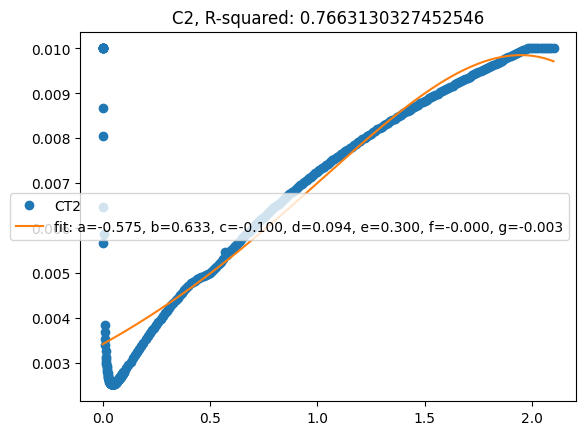

In [427]:
cT2 = data["C2"].to_numpy()
#initial_guess = [0.012, 1.366, 0.683, -0.000, 0.001]
#bounds = ([0, 1, 0.6, -0.01, -0.001], [0.05, 2, 0.8, 0.01, 0.001])
initial_guess = [-0.27, 1.25, 0.01, 0.1, 0.14, -0.02, 0.001]
bounds = ([-1, 0.5, -0.1, 0, 0, -0.1, -0.01], [0, 2, 0.1, 0.2, 0.3, 0, 0.01])

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
#[a, b, c, d, e, f] = params[0]
#para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f, g)


plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f)
residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C2, R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

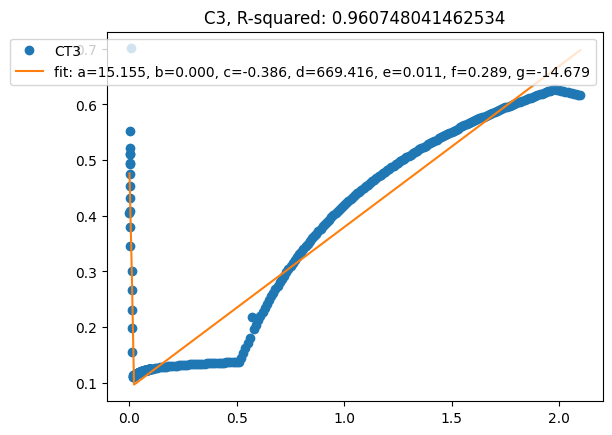

In [428]:
cT3 = data["C3"].to_numpy()
initial_guess = [15, 0.001, 0, 750, 0.02, 0.3, -15]
bounds = ([0, 0, -1, 500, 0, 0, -20], [20, 0.01, 1, 1000, 0.05, 1, 0])

params = curve_fit(cT3_func, PEEQ, cT3, p0=initial_guess,bounds=bounds, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C3, R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

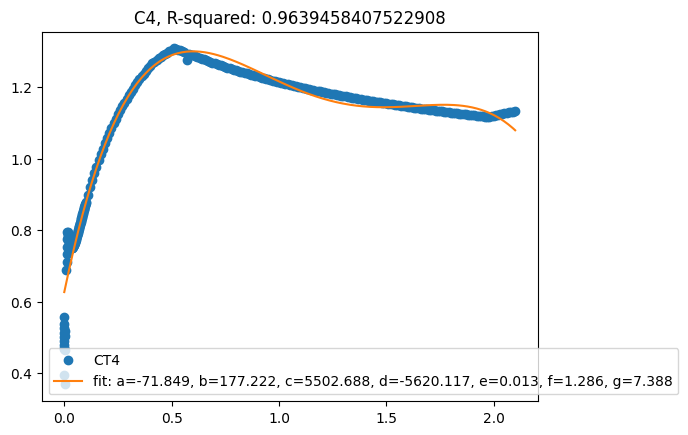

In [429]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C4, R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

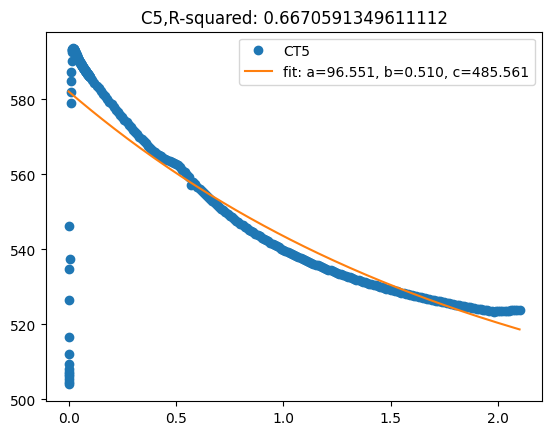

In [430]:
cT5 = data["C5"].to_numpy()
initial_guess = [580, 0.5, 500]

params = curve_fit(cT5_func, PEEQ, cT5, p0= initial_guess, maxfev = 1000000)
[a, b, c] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f' % (a, b, c)))
plt.title(f'C5,R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

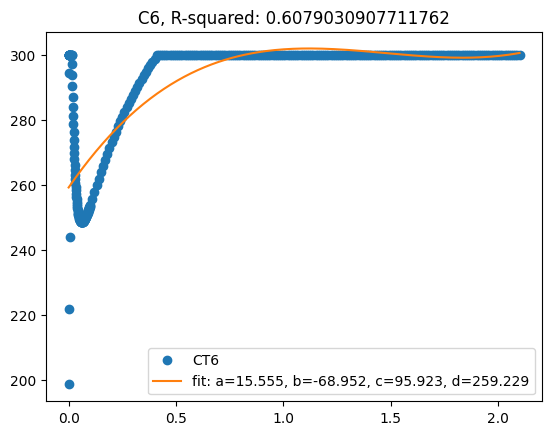

In [431]:
cT6 = data["C6"].to_numpy()
initial_guess = [1, 1, 1, 200]
bounds = ([-1e3, -1e3, -1e3, 0], [1e3, 1e3, 1e3, 1e6])

params = curve_fit(cT6_func, PEEQ, cT6, maxfev=1000000)
[a, b, c, d] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C6, R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [432]:
df_para_fit.to_csv('./para_fit_results_0.0001.csv', index=False)

Use optimized inputs to validate

In [433]:
# Assuming the file is one level up from the current directory
file_path = os.path.join("..", "Fitted_FC_TmpDpn_RD_StrRt0.0001_ref.csv")
stress_data = pd.read_csv(file_path)

fitted_para = pd.read_csv('para_fit_results_0.0001.csv')

[2.82914622 1.50746458 1.         1.51249493 1.72236651 1.70664659
 1.19383934]


C:\Users\socca\AppData\Local\Temp\ipykernel_37396\1491831523.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


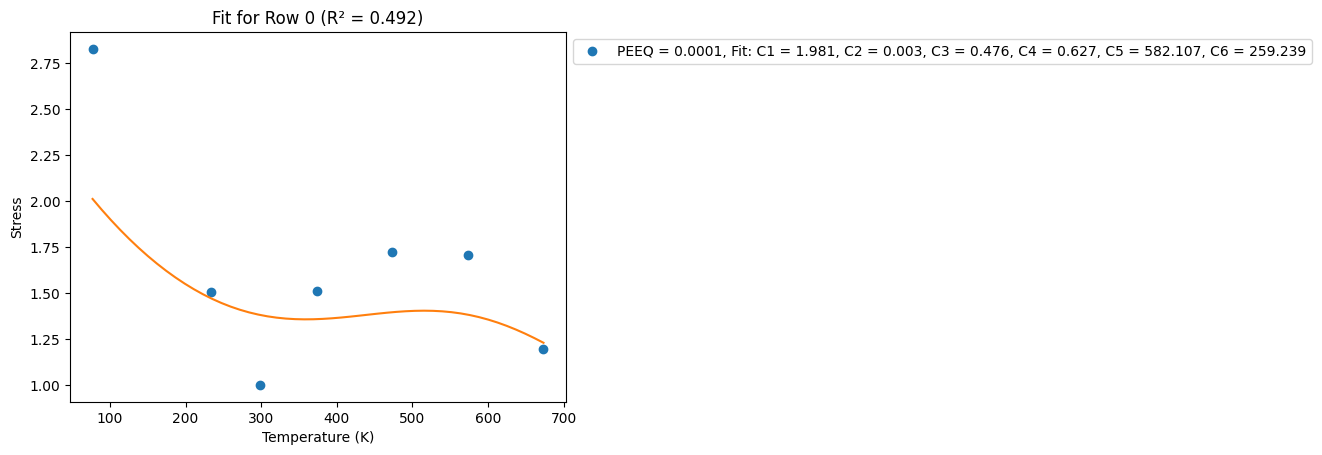

[2.33219773 1.26455856 1.         1.32765637 1.4637548  1.43116091
 1.16800752]


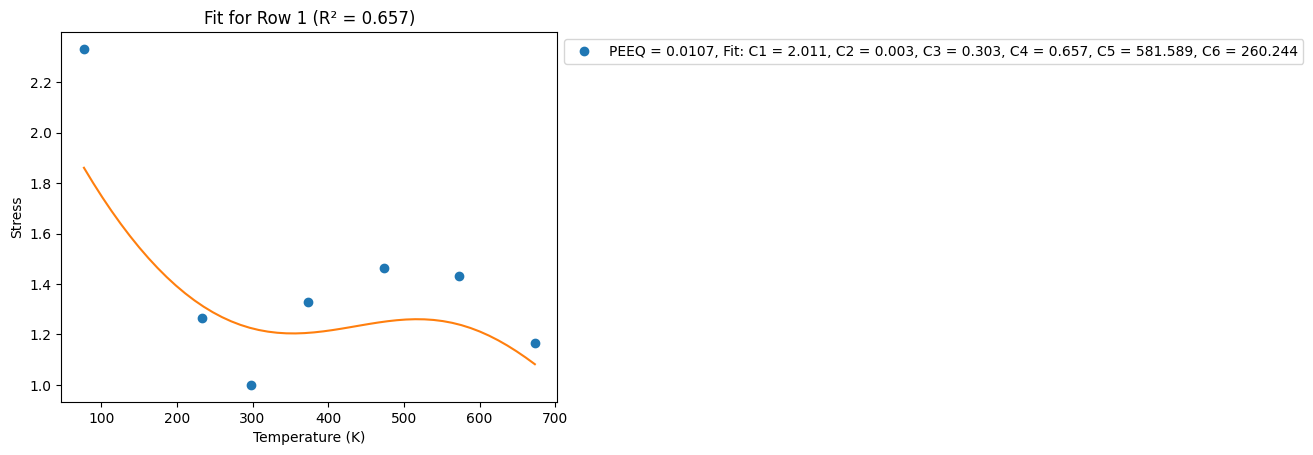

[1.88977535 1.04028073 1.         1.10573315 1.20809166 1.17370133
 0.99026645]


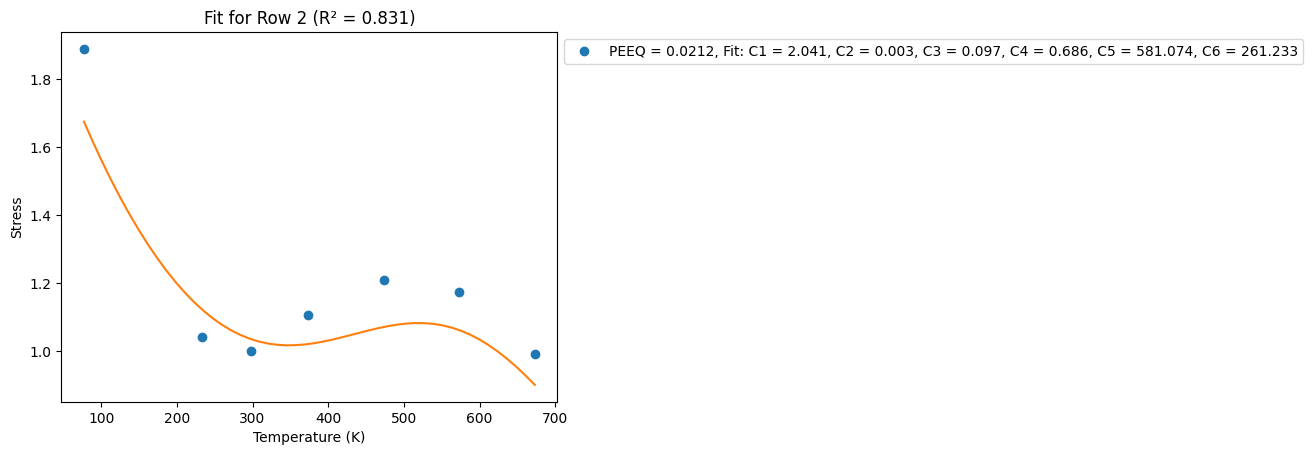

[1.75580815 0.98239076 1.         1.0486669  1.13967641 1.10277459
 0.94778786]


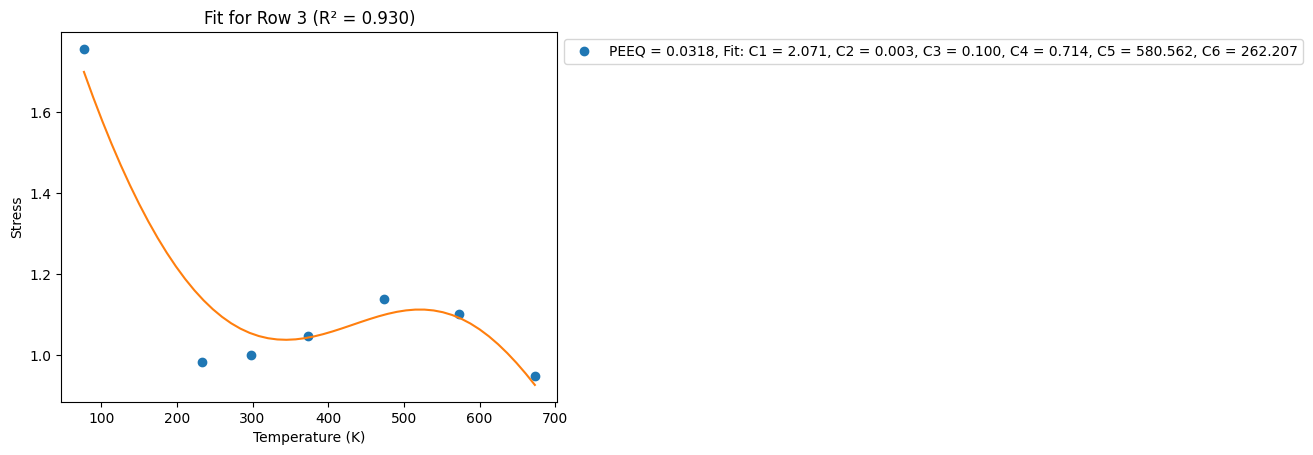

[1.70260576 0.96735308 1.         1.03210659 1.11772935 1.07936231
 0.93761111]


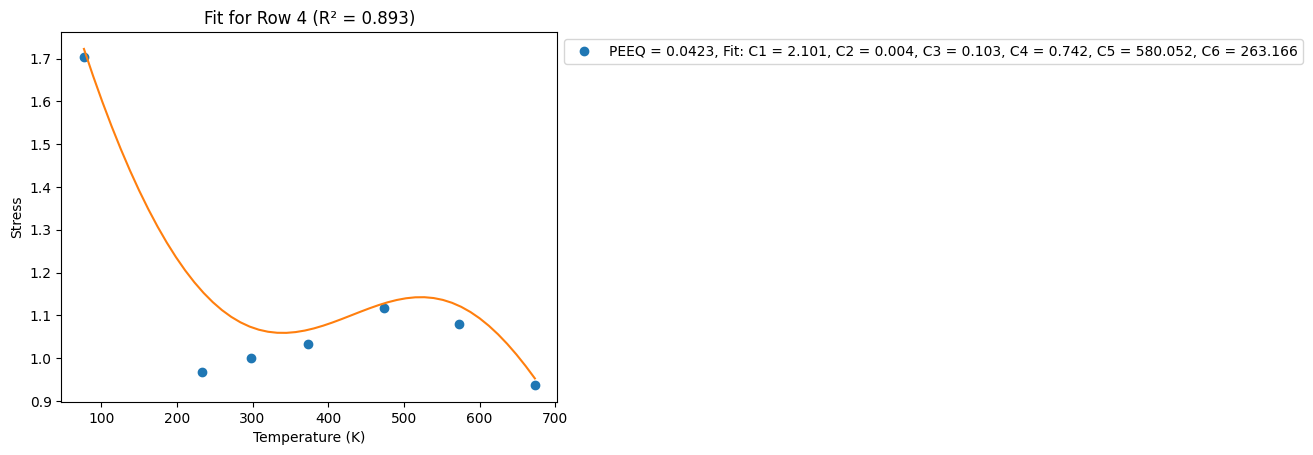

[1.67202446 0.9636772  1.         1.02517726 1.1071245  1.06828681
 0.93438411]


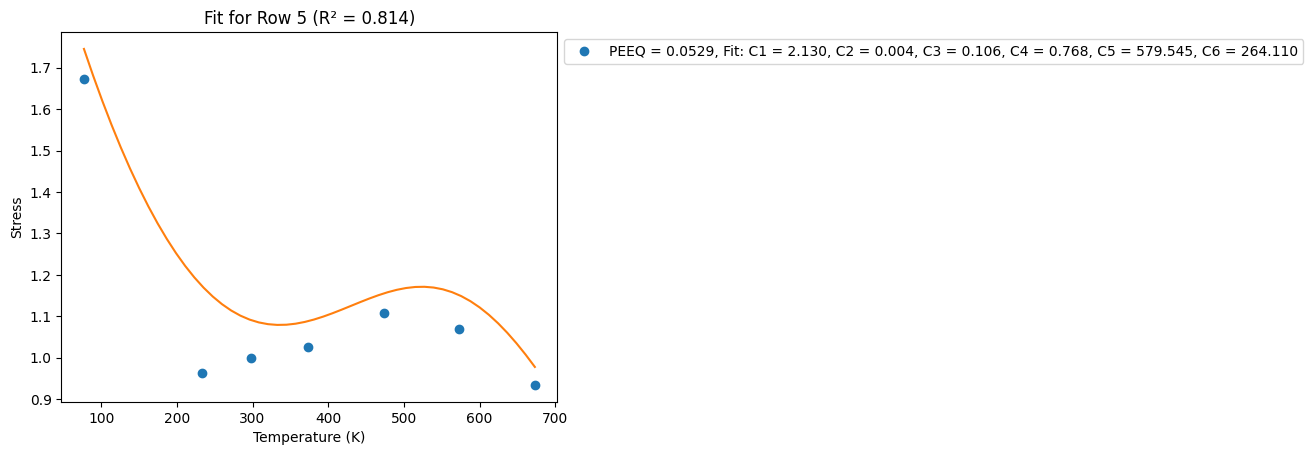

[1.64977962 0.96358756 1.         1.0207674  1.09970582 1.06107194
 0.93250779]


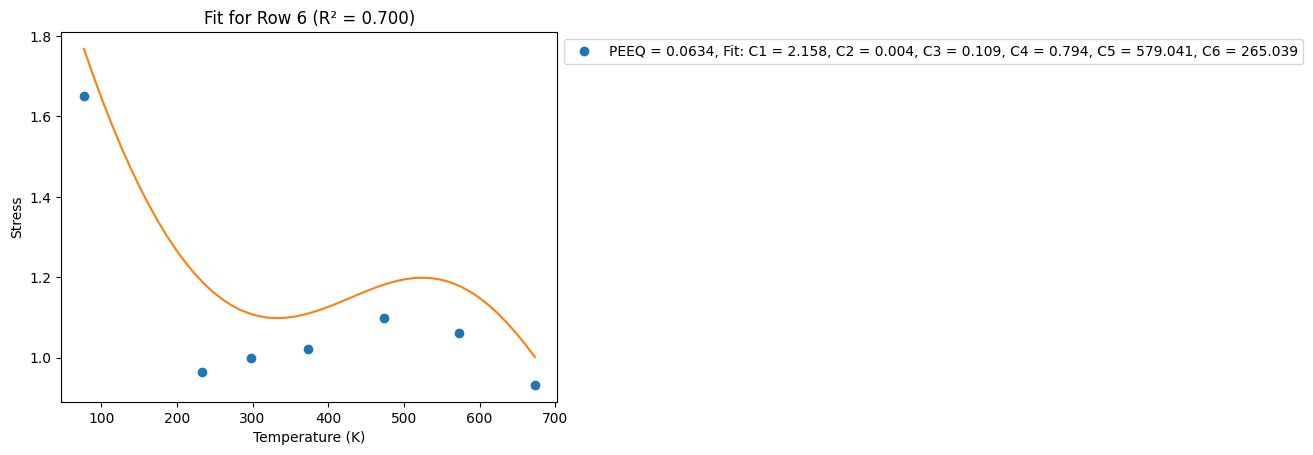

[1.59135519 0.97146423 1.         1.00816312 1.07818814 1.04261654
 0.92557132]


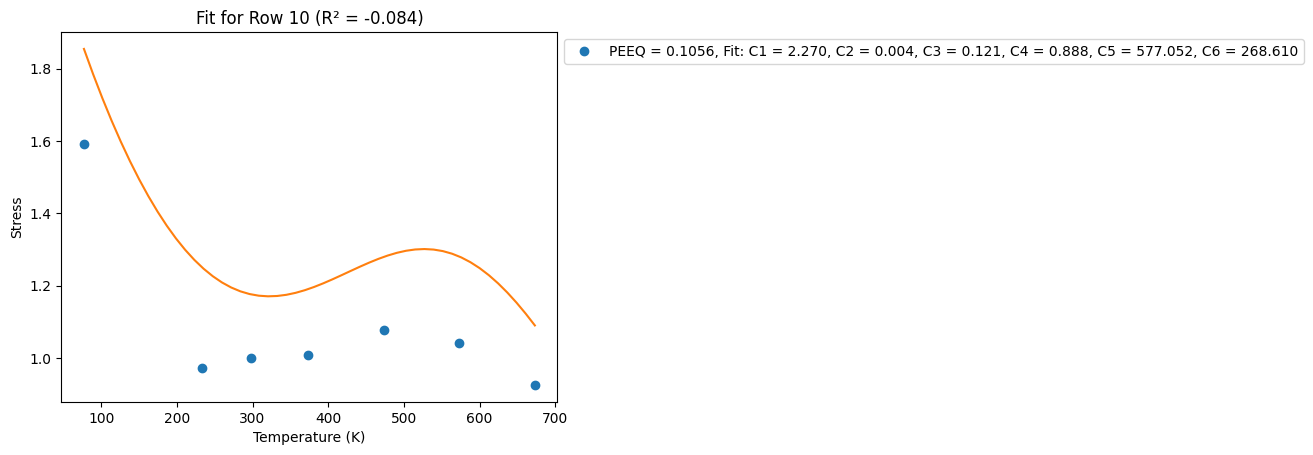

[1.52308237 0.99512694 1.         0.99046308 1.05028236 1.0195775
 0.91318337]


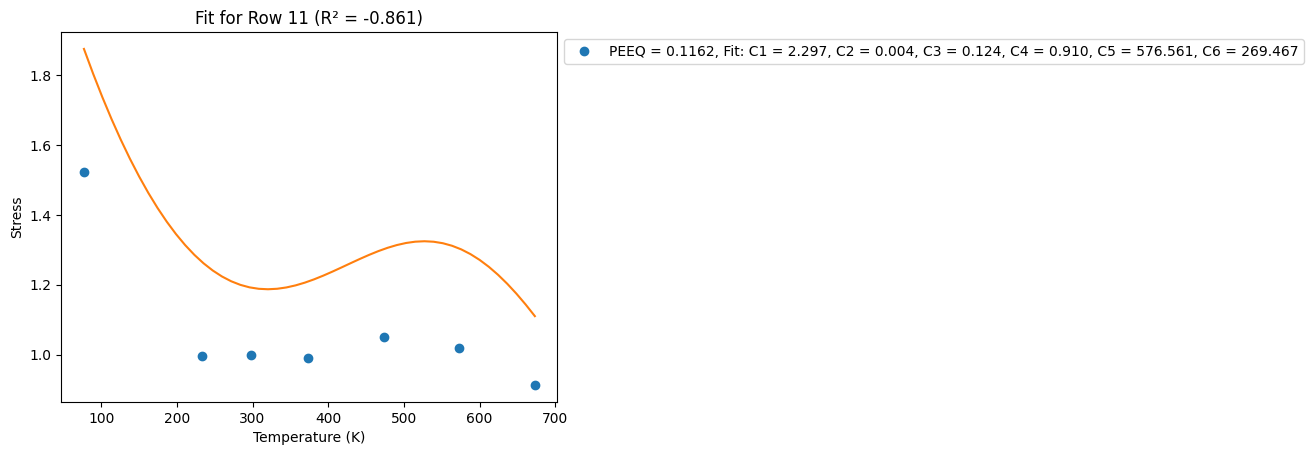

[1.46346827 1.02506208 1.         0.97694684 1.02940085 1.00337592
 0.90251418]


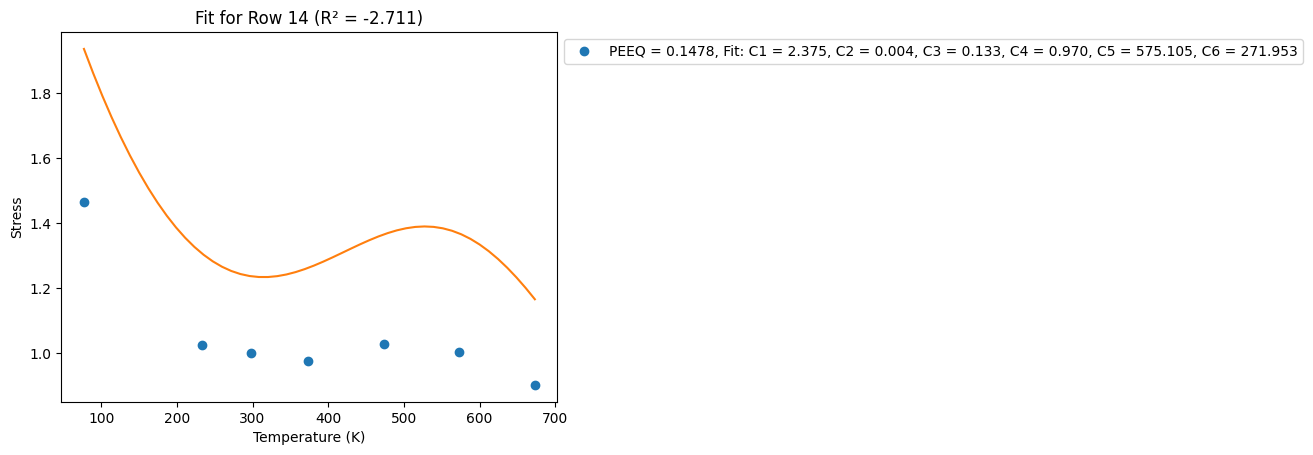

[1.43427297 1.03294434 1.         0.97719854 1.02511894 1.00856621
 0.90042063]


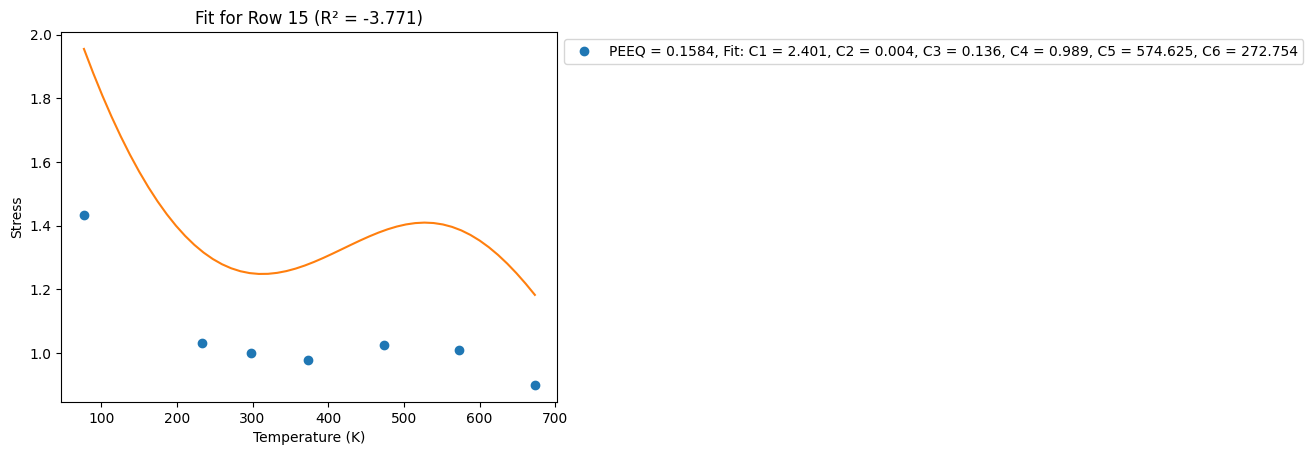

[1.42108056 1.03699166 1.         0.979791   1.02588198 1.01656784
 0.89993155]


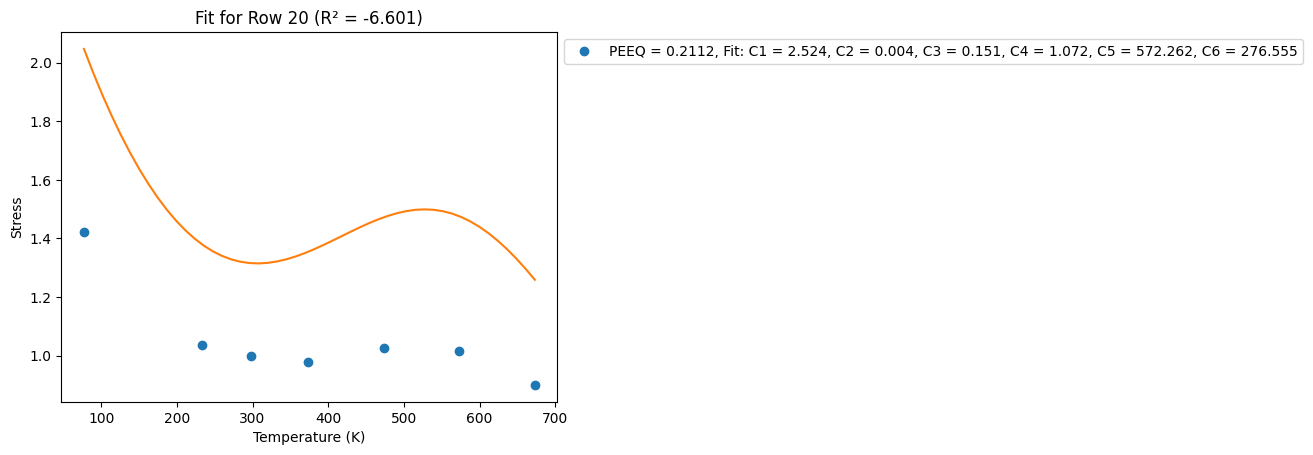

[1.41455959 1.04130102 1.         0.98175445 1.02752097 1.02333539
 0.89958156]


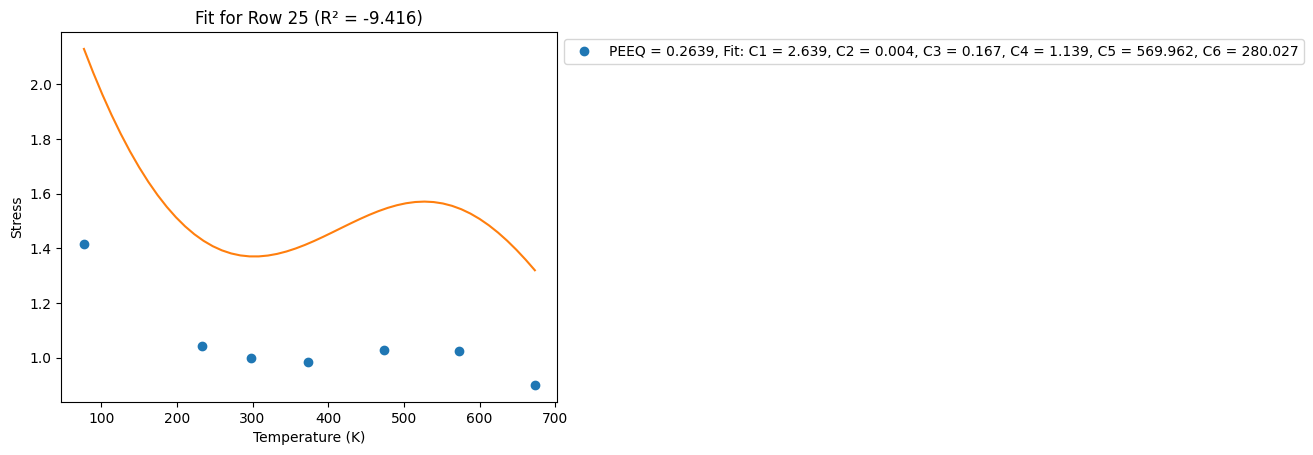

[1.41173245 1.04492866 1.         0.98310133 1.029308   1.02899767
 0.89941865]


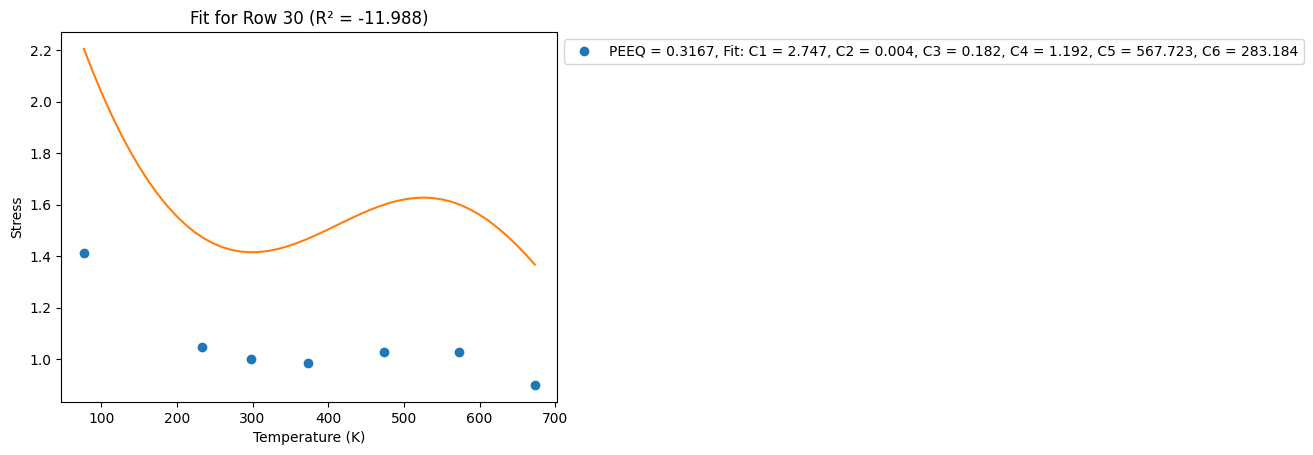

[1.4110547  1.04750822 1.         0.98407646 1.03105633 1.03384807
 0.89946539]


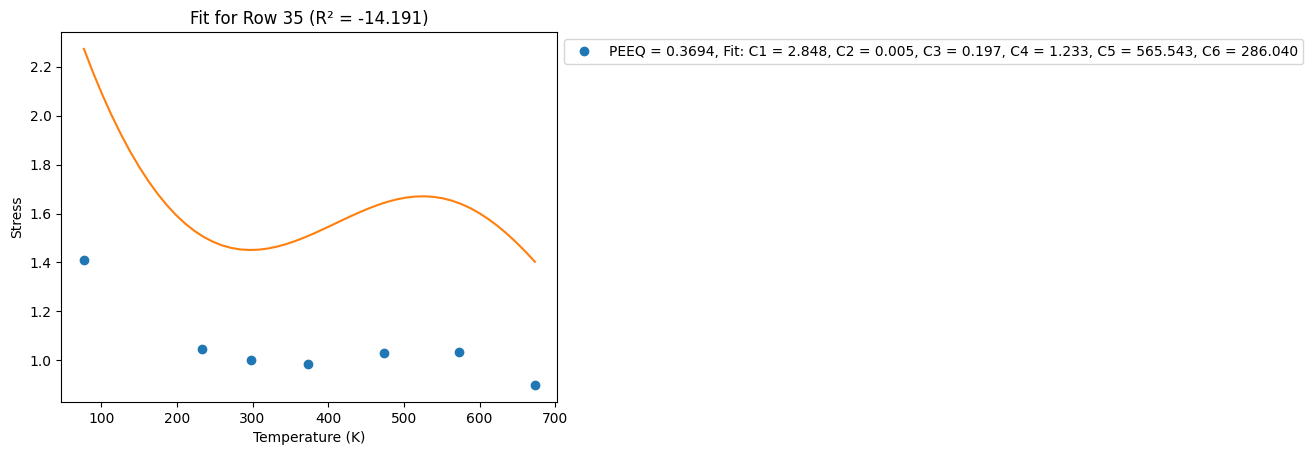

[1.4116733  1.04911386 1.         0.98485877 1.03271389 1.03809102
 0.89969087]


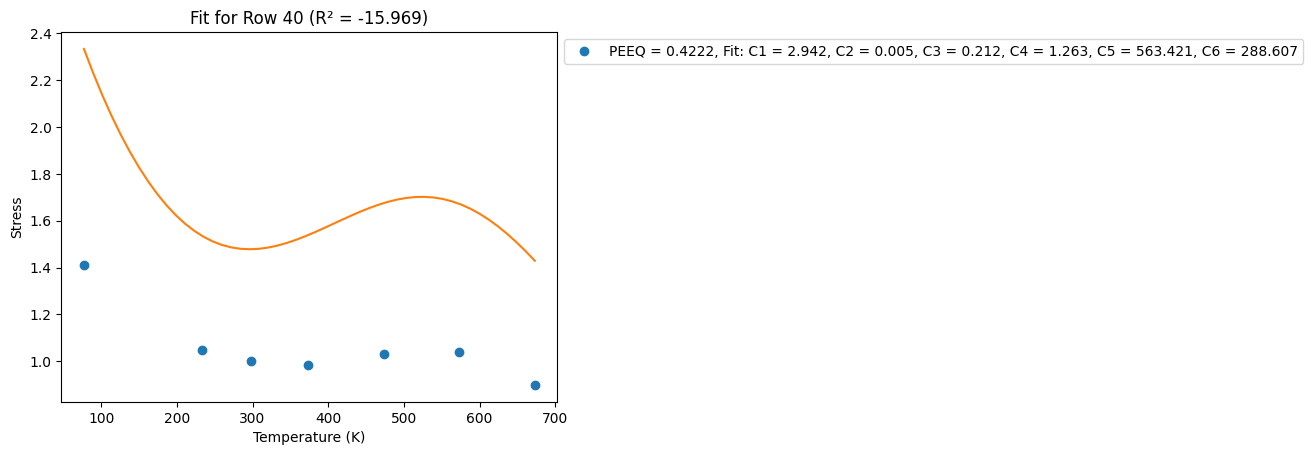

[1.41310172 1.04995285 1.         0.98555223 1.03426989 1.04186381
 0.90005065]


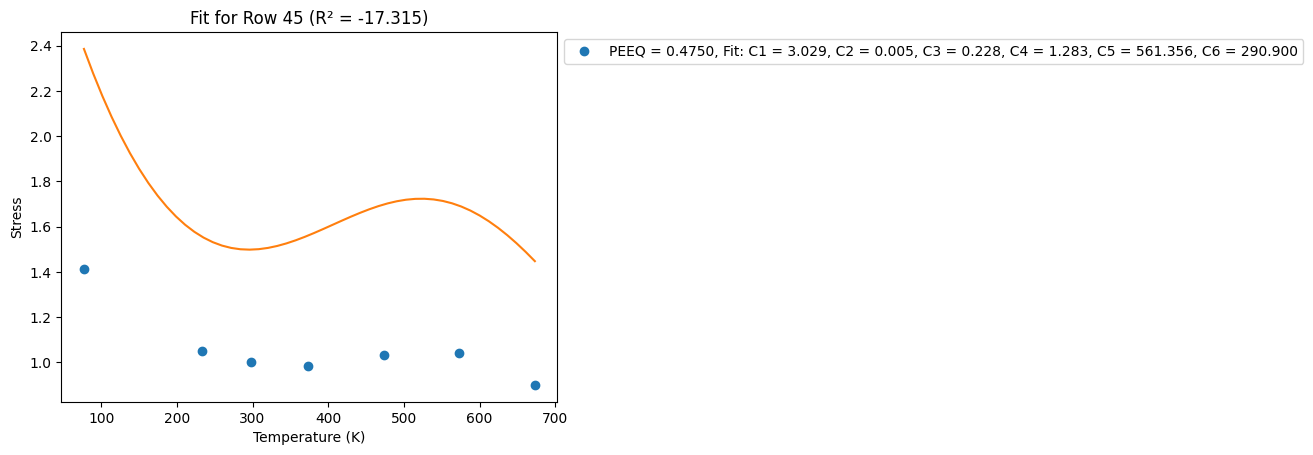

[1.41505132 1.05023056 1.         0.98621119 1.03572732 1.04526194
 0.90050489]


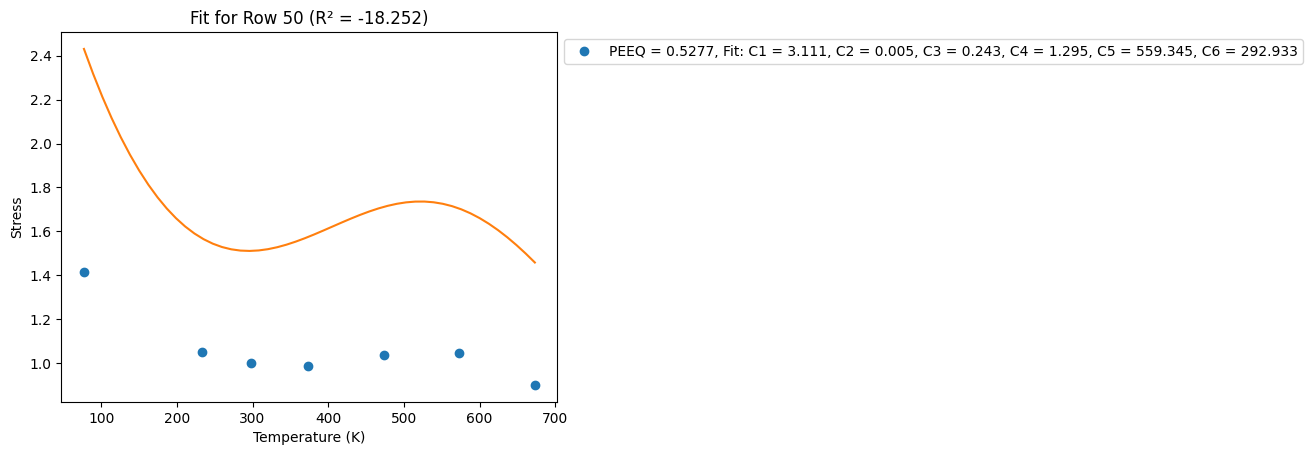

[1.44256922 1.04314139 1.         0.9927384  1.04648508 1.06812961
 0.90637621]


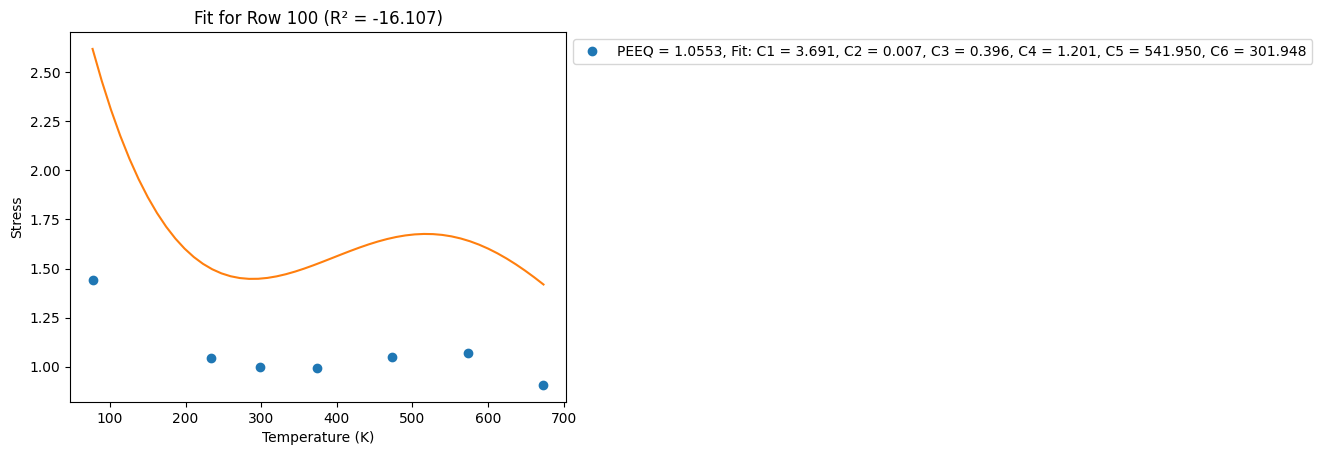

[1.72749803 0.98633134 1.         1.04207998 1.09039066 1.15053584
 0.95148916]


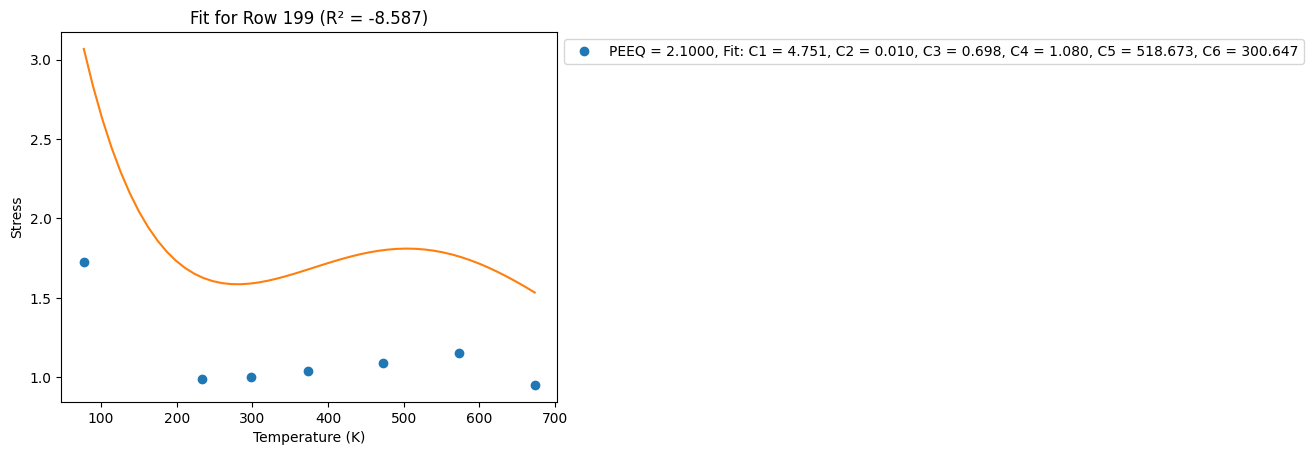

In [434]:
# Temperarute data points
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.array([0, 1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 8:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)

Load data for StrRt 0.001

In [435]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.001.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

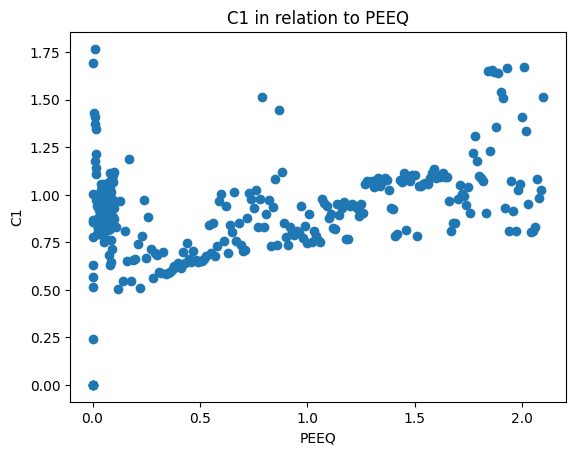

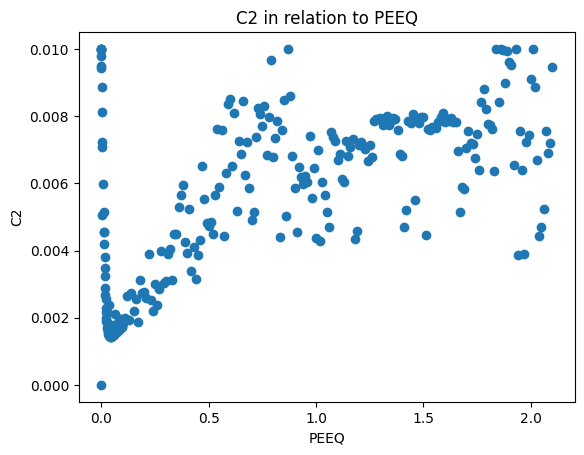

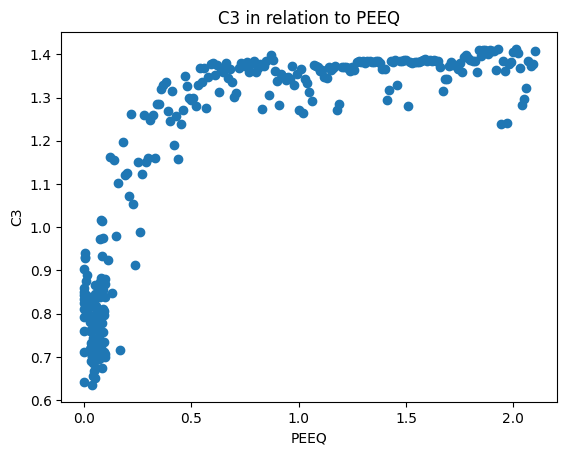

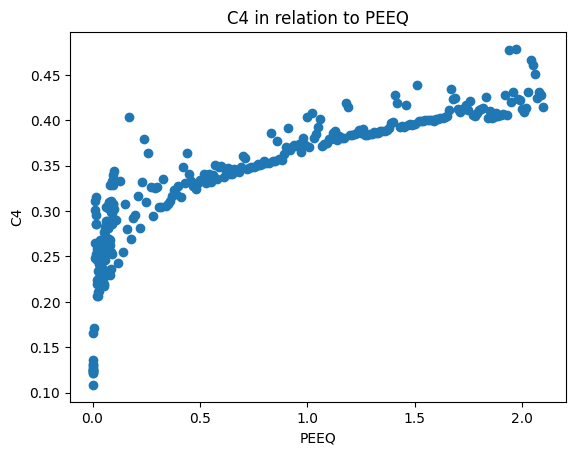

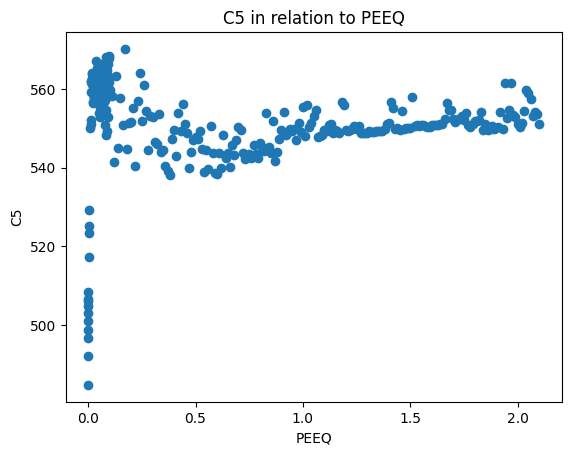

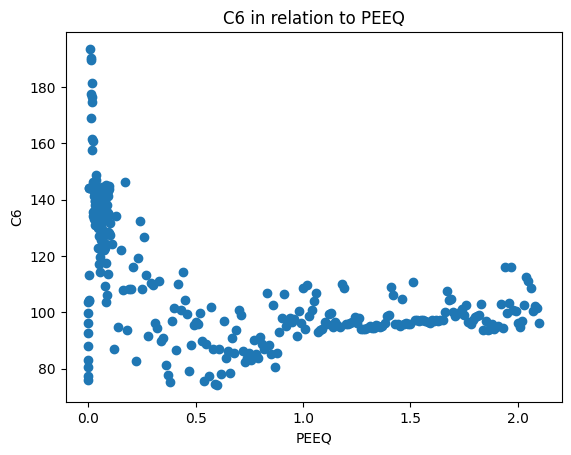

In [436]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()

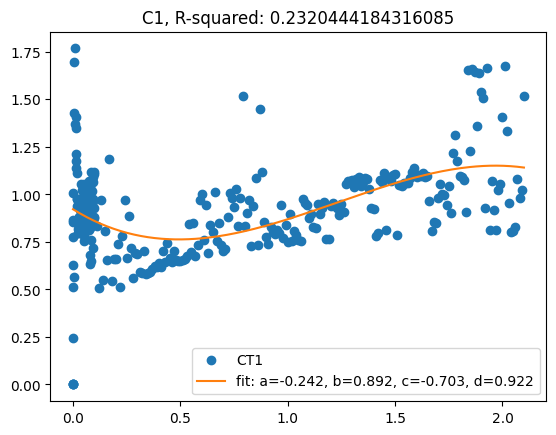

In [437]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
#initial_guess = [1.369, 5.312, 4.964, -0.218, 2.677, -5.0, -0.359, 1.942]
#param_bounds = ([0.1, 0, 0.1, -1, 0, -10, -1, 0], [10, 10, 20, 1, 10, 0, 1, 10])
initial_guess = [0.1, 0.1, 0.1, np.mean(cT1)]
param_bounds = ([-10, -10, -10, 0], [10, 10, 10, 5])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guess, bounds=param_bounds, maxfev = 1000000)
#[a, b, c, d, e, f, g ,h] = params
#para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)
[a, b, c, d] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
residuals = cT1 - cT1_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C1, R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

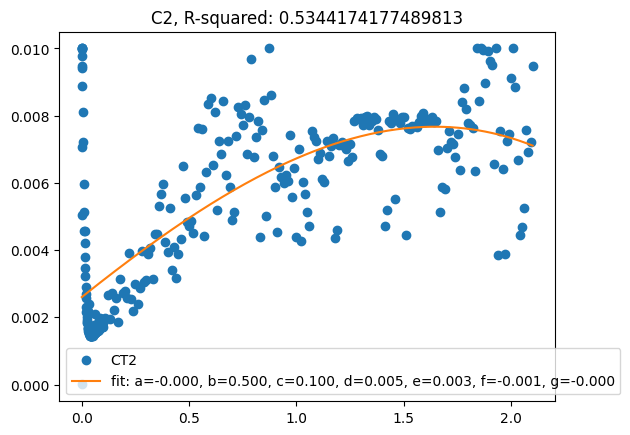

In [438]:
cT2 = data["C2"].to_numpy()
#initial_guess = [0.012, 1.366, 0.683, -0.000, 0.001]
#bounds = ([0, 1, 0.6, -0.01, -0.001], [0.05, 2, 0.8, 0.01, 0.001])
initial_guess = [-0.27, 1.25, 0.01, 0.1, 0.14, -0.02, 0.001]
bounds = ([-1, 0.5, -0.1, 0, 0, -0.1, -0.01], [0, 2, 0.1, 0.2, 0.3, 0, 0.01])

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
#[a, b, c, d, e, f] = params[0]
#para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f, g)


plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f)
residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C2, R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

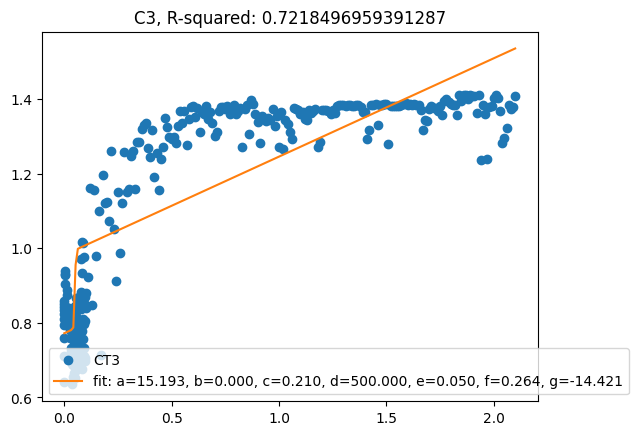

In [439]:
cT3 = data["C3"].to_numpy()
initial_guess = [15, 0.001, 0, 750, 0.02, 0.3, -15]
bounds = ([0, 0, -1, 500, 0, 0, -20], [20, 0.01, 1, 1000, 0.05, 1, 0])

params = curve_fit(cT3_func, PEEQ, cT3, p0=initial_guess,bounds=bounds, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C3, R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

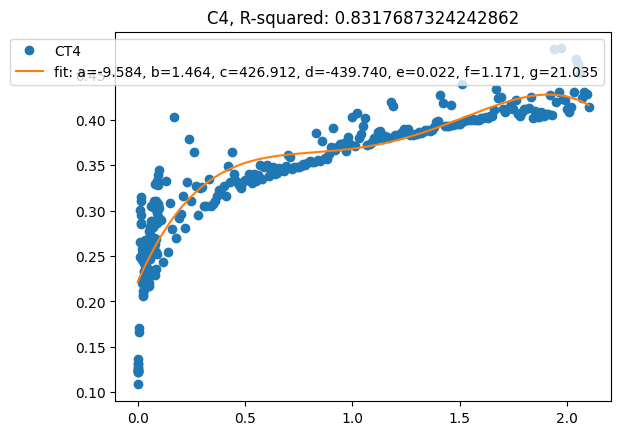

In [440]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C4, R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

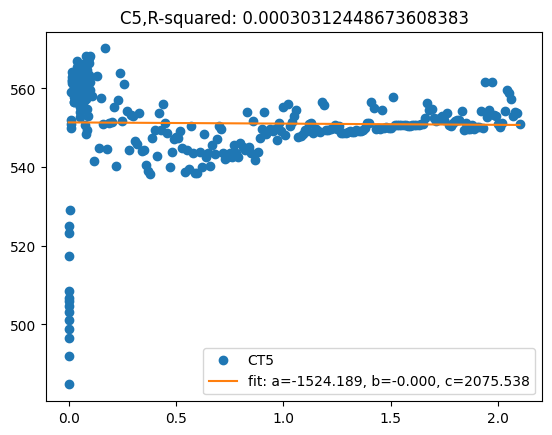

In [441]:
cT5 = data["C5"].to_numpy()
initial_guess = [580, 0.5, 500]

params = curve_fit(cT5_func, PEEQ, cT5, p0= initial_guess, maxfev = 1000000)
[a, b, c] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f' % (a, b, c)))
plt.title(f'C5,R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

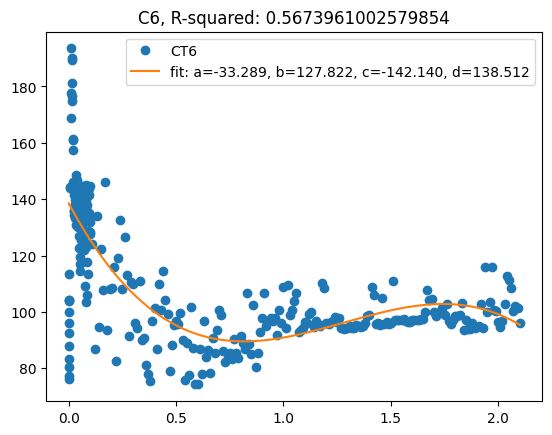

In [442]:
cT6 = data["C6"].to_numpy()
initial_guess = [1, 1, 1, 200]
bounds = ([-1e3, -1e3, -1e3, 0], [1e3, 1e3, 1e3, 1e6])

params = curve_fit(cT6_func, PEEQ, cT6, maxfev=1000000)
[a, b, c, d] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C6, R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [443]:
df_para_fit.to_csv('./para_fit_results_0.001.csv', index=False)

In [444]:
file_path = os.path.join("..", "Fitted_FC_TmpDpn_RD_StrRt0.001_ref.csv")
stress_data = pd.read_csv(file_path)

fitted_para = pd.read_csv('para_fit_results_0.001.csv')

[1.         0.91720035 1.01474164 0.99226121 1.18490068]


C:\Users\socca\AppData\Local\Temp\ipykernel_37396\3597178534.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


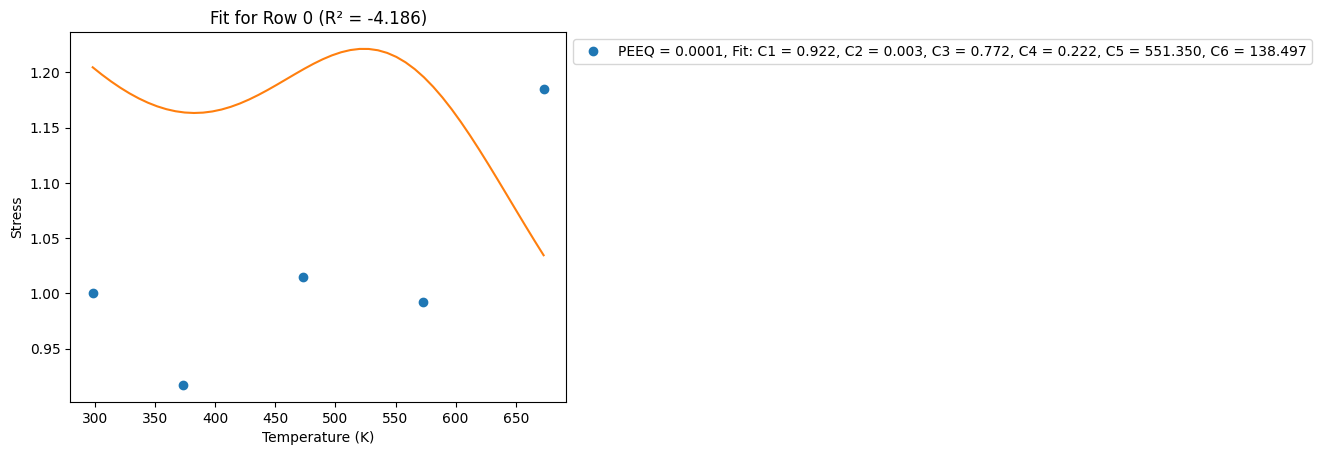

[1.         1.13838483 1.29706169 1.1592642  1.22508004]


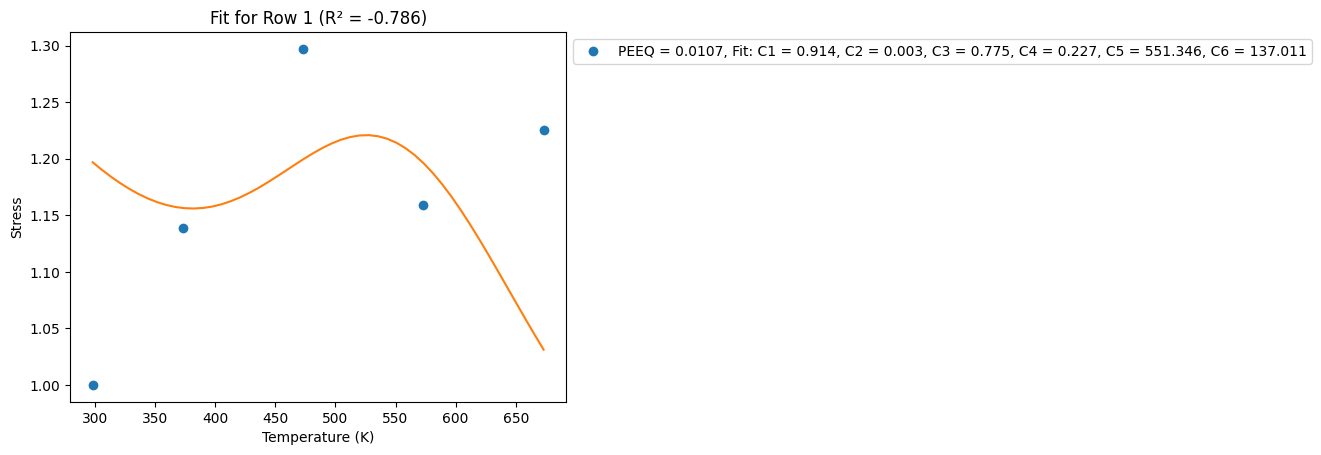

[1.         1.06535969 1.23046722 1.11033889 1.09774118]


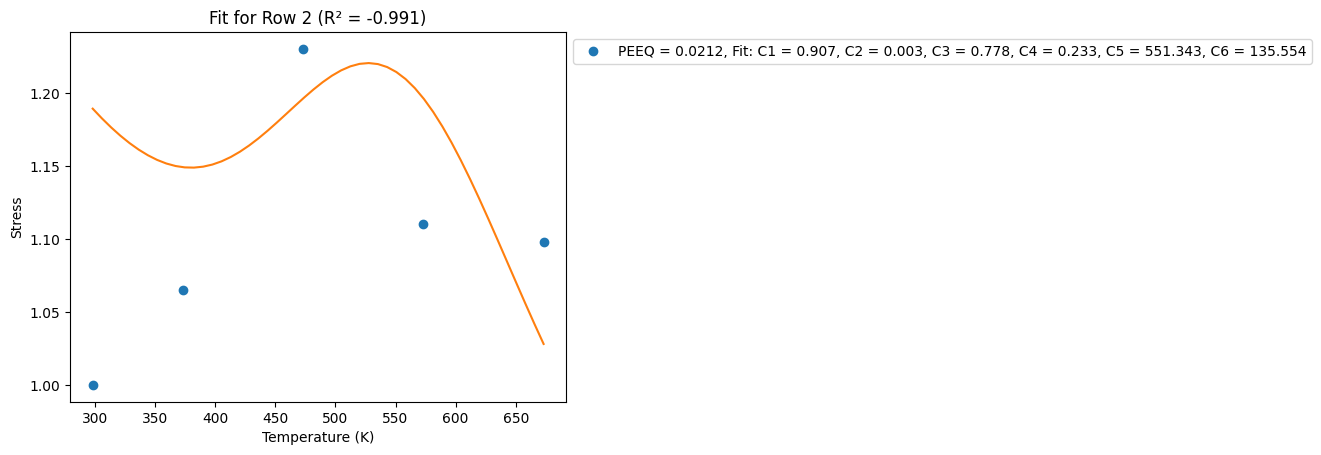

[1.         1.03503088 1.18648497 1.09100312 1.03961112]


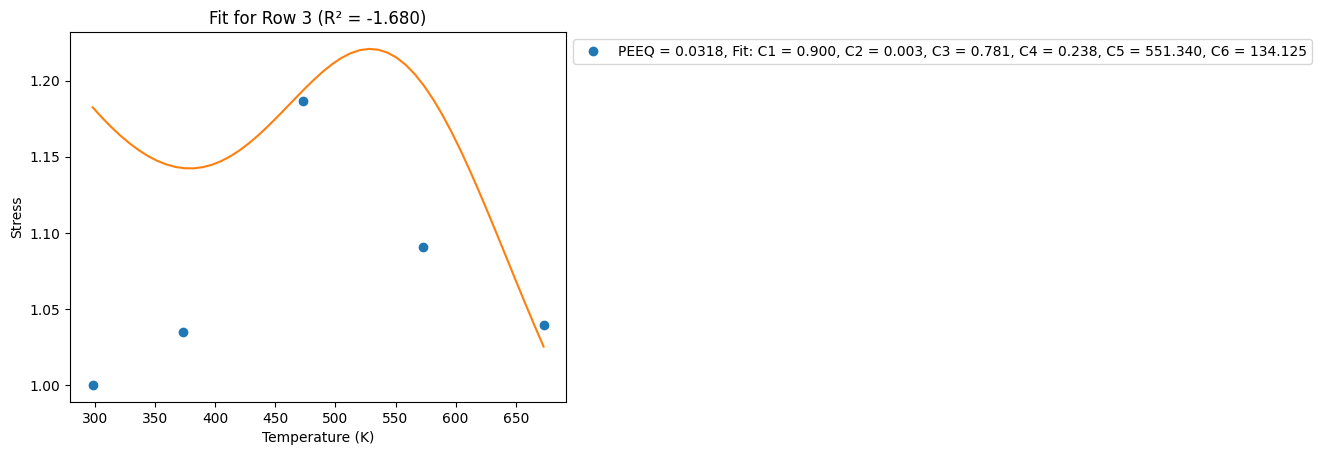

[1.         1.01949779 1.15281506 1.07677864 1.00807841]


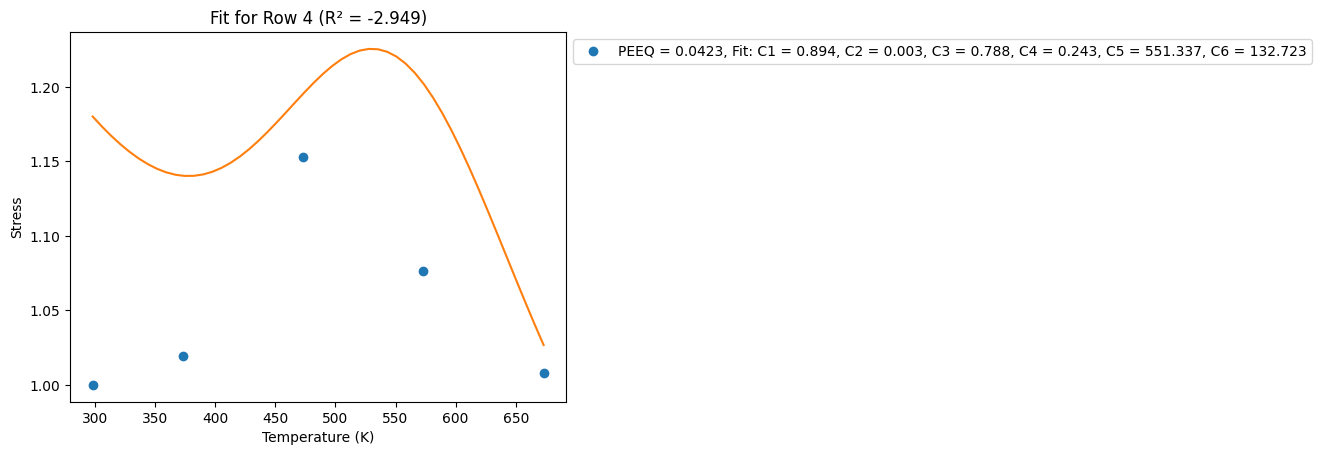

[1.         1.00995907 1.12692238 1.06445979 0.98801886]


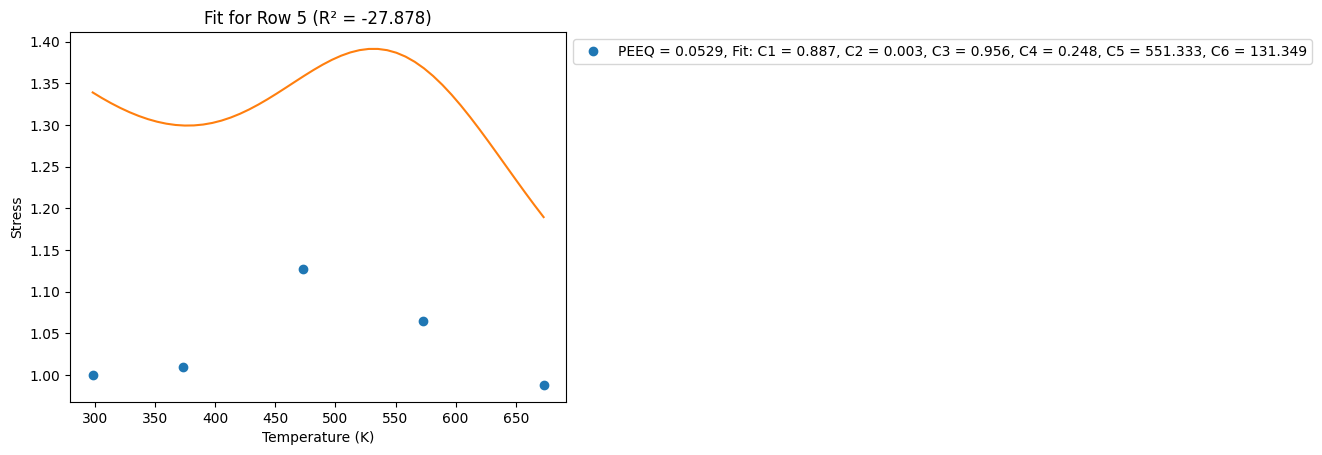

[1.         1.00346429 1.10714225 1.05390083 0.97404486]


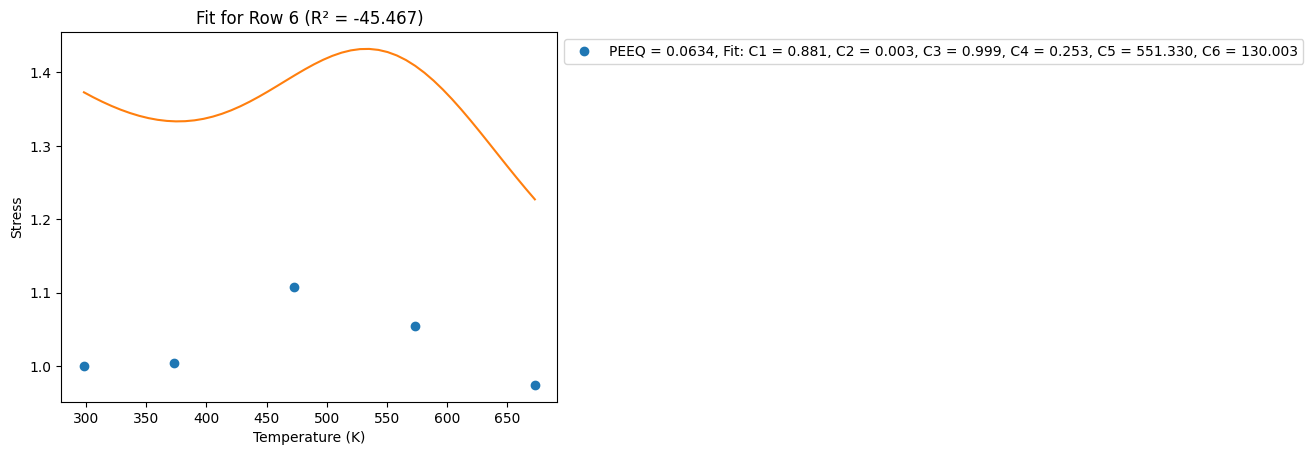

[1.         0.98999175 1.06328129 1.02691319 0.94432276]


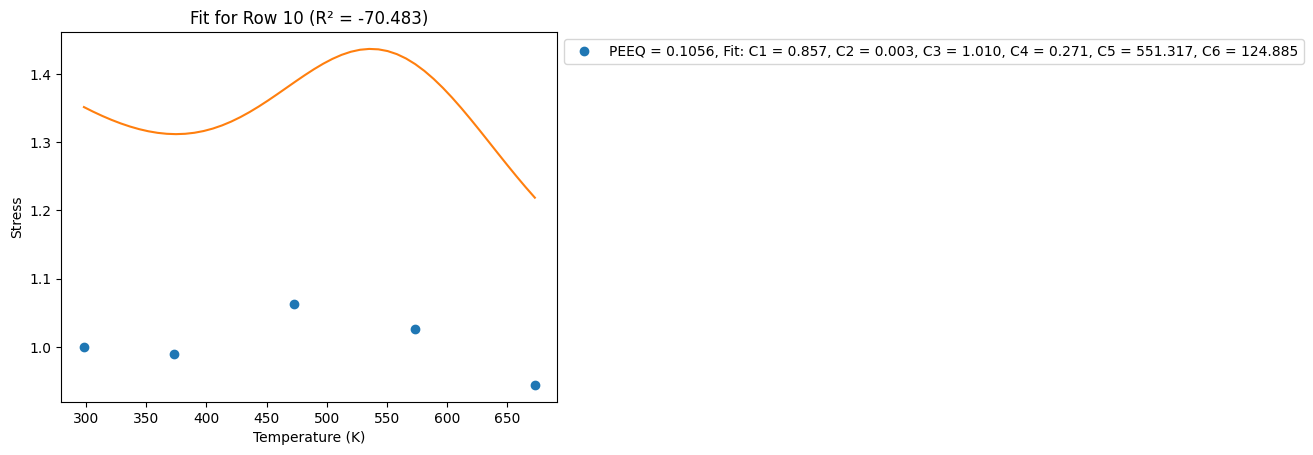

[1.         0.97936789 1.0304727  1.00622046 0.92050649]


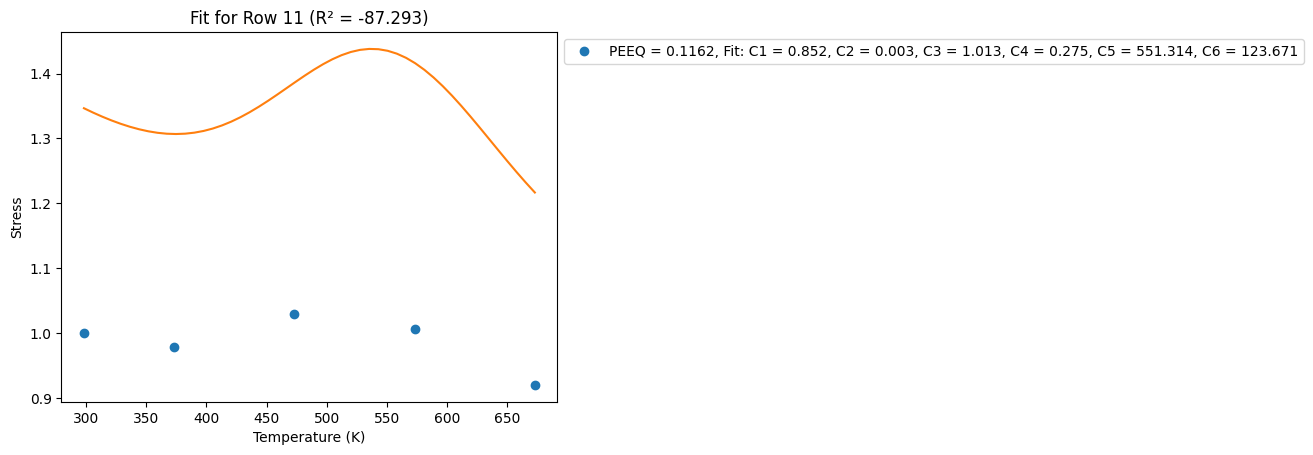

[1.         0.97362455 1.01336262 0.99961262 0.90616415]


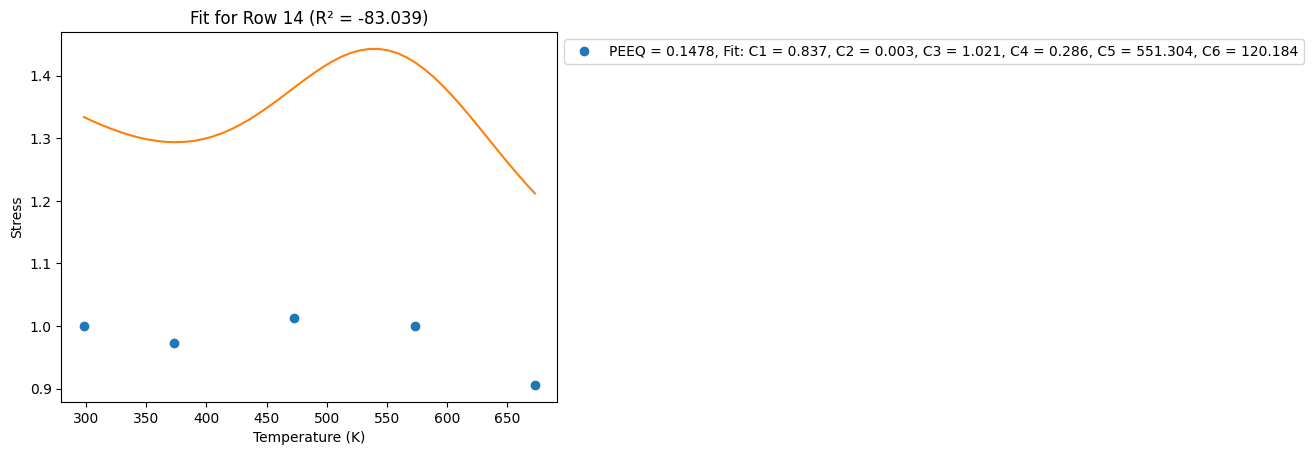

[1.         0.97313317 1.00752125 1.0013276  0.89939999]


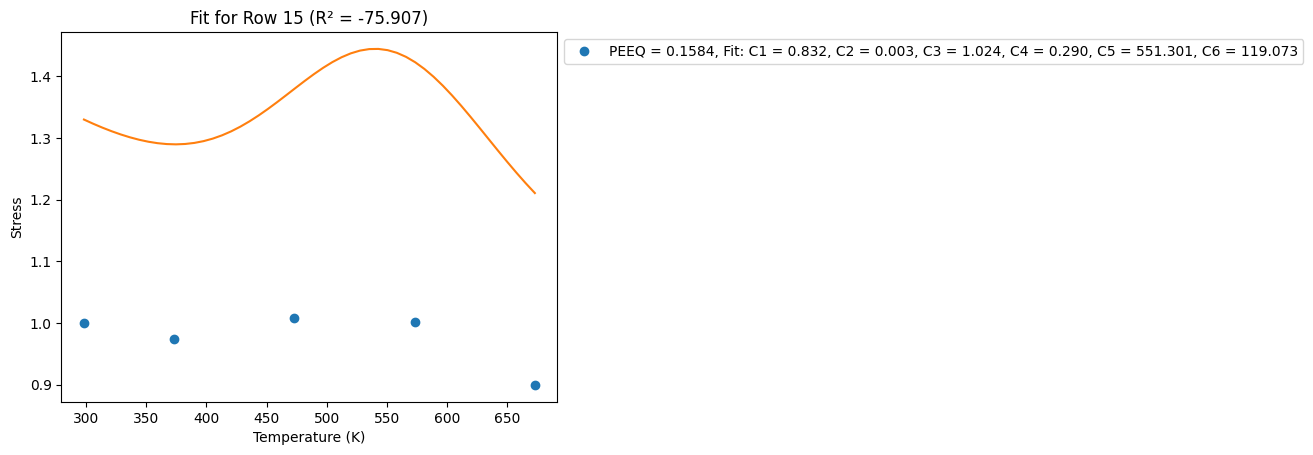

[1.         0.97358619 1.00549405 1.00427058 0.89542859]


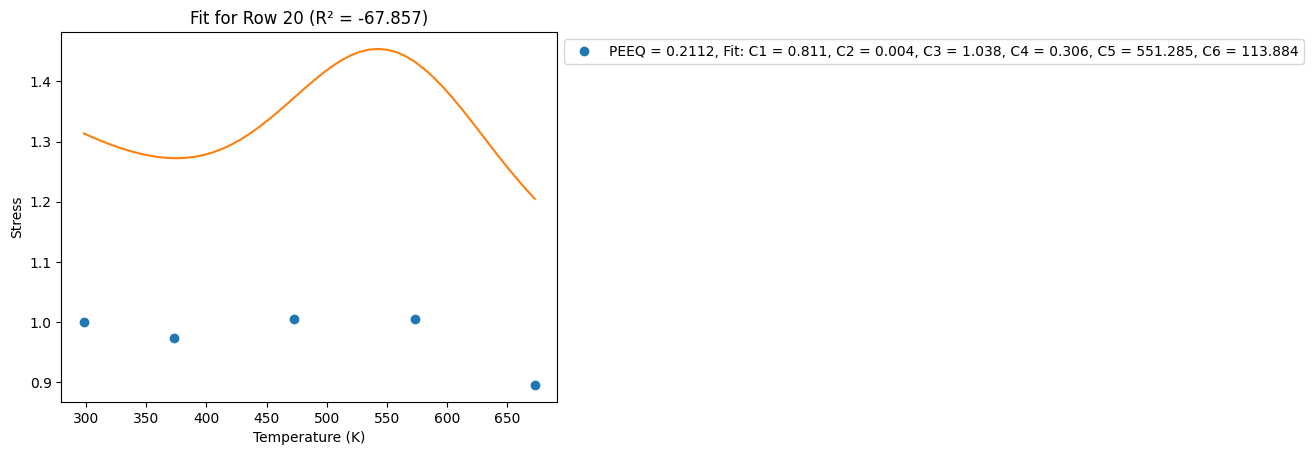

[1.         0.97394831 1.0051087  1.00775756 0.89320913]


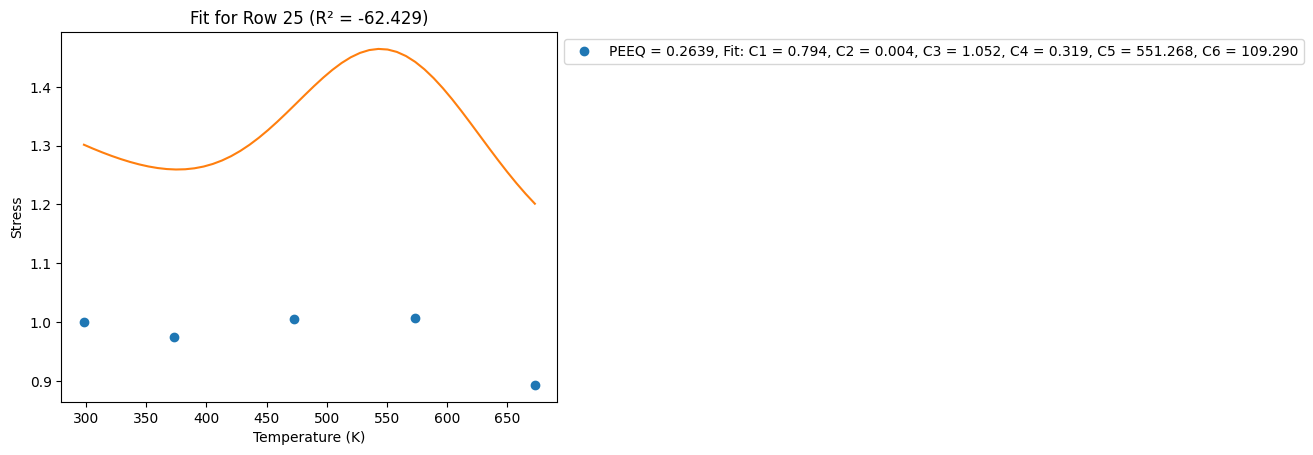

[1.         0.97415766 1.00571756 1.01159021 0.89232708]


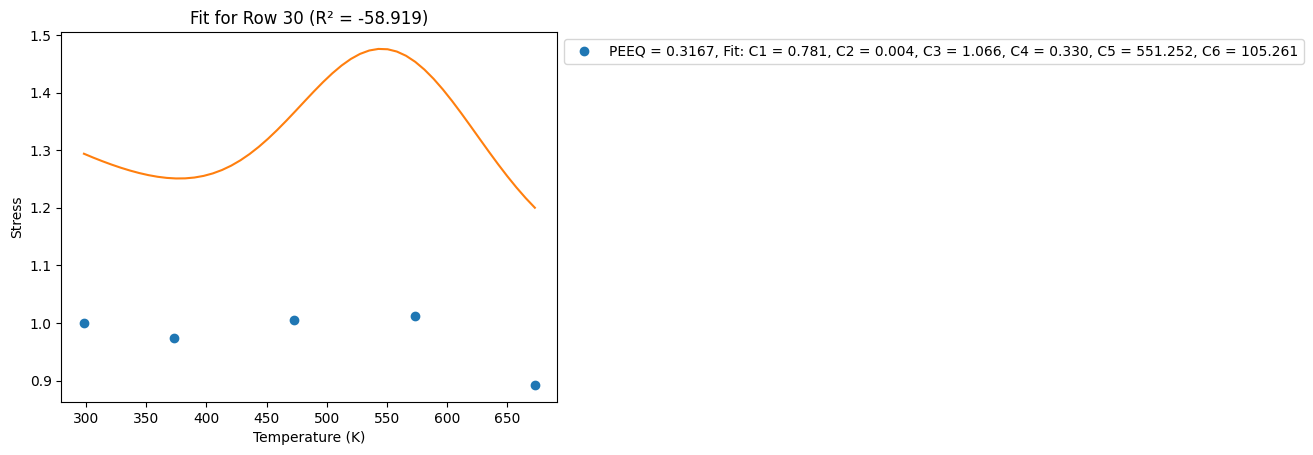

[1.         0.97425723 1.00693402 1.01559274 0.89237261]


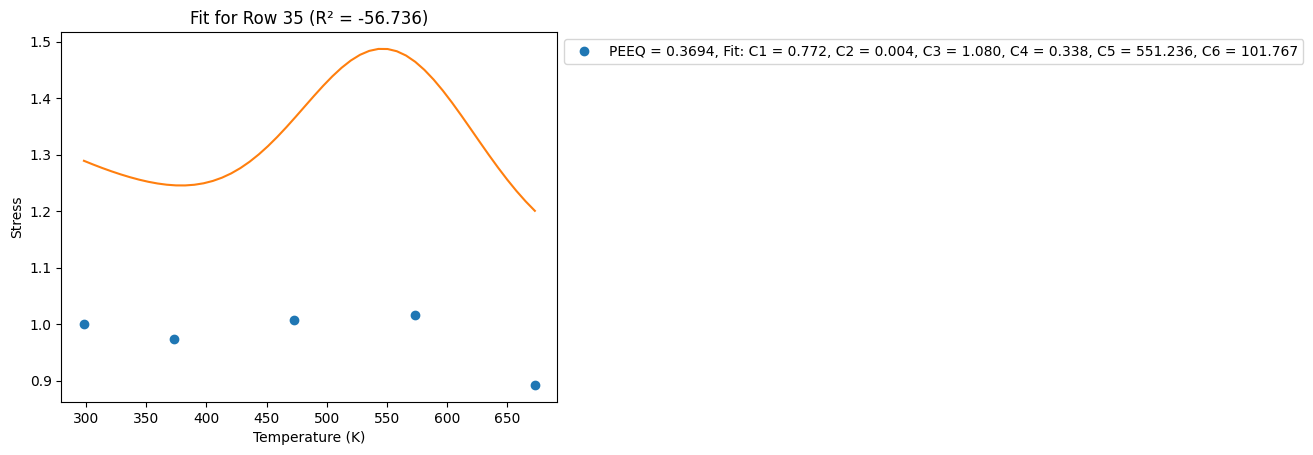

[1.         0.97429078 1.0085035  1.01962921 0.89302177]


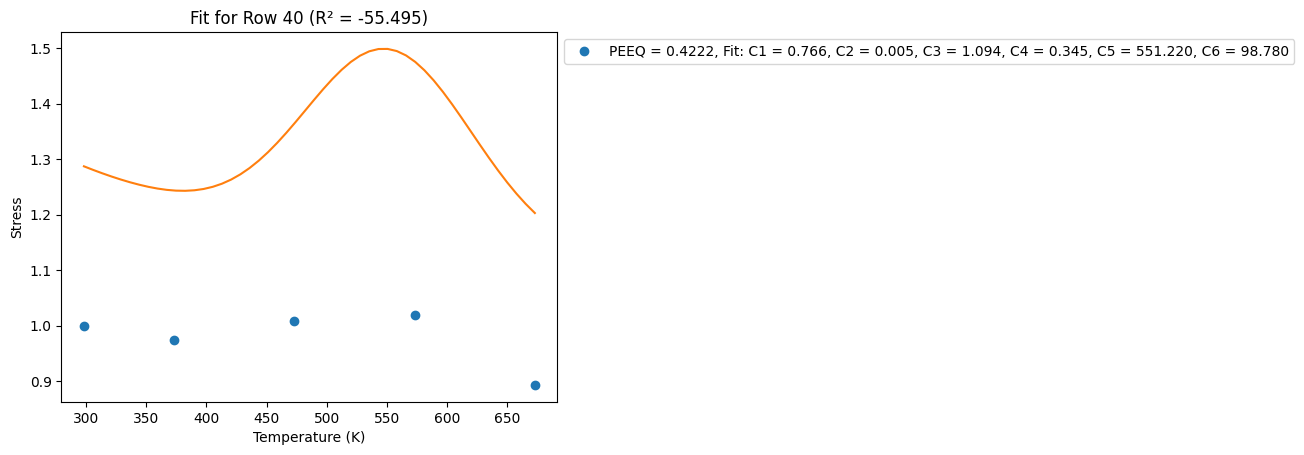

[1.         0.97428914 1.01025818 1.02360589 0.89404535]


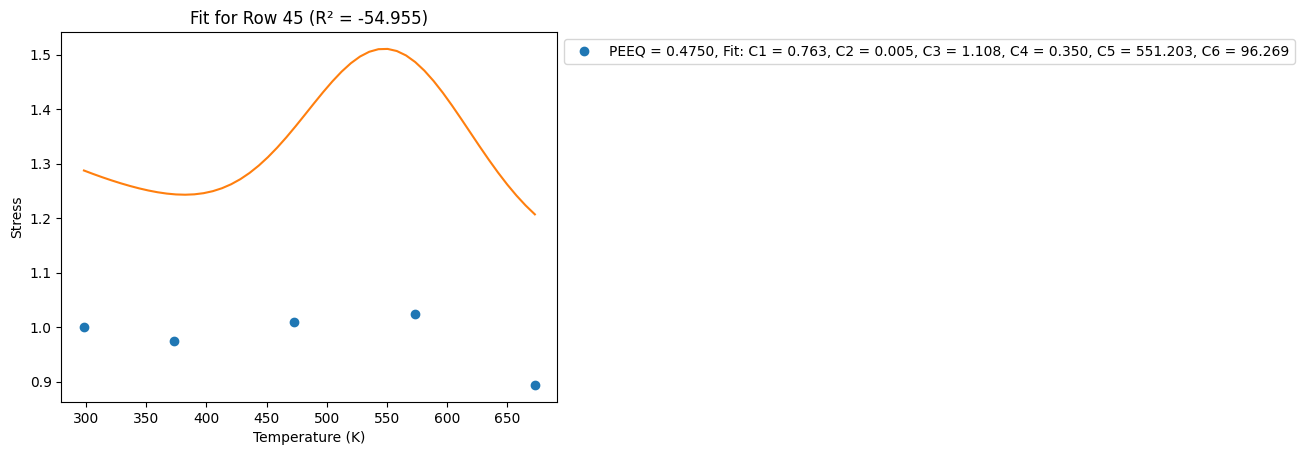

[1.         0.97427163 1.01208918 1.02746358 0.89528901]


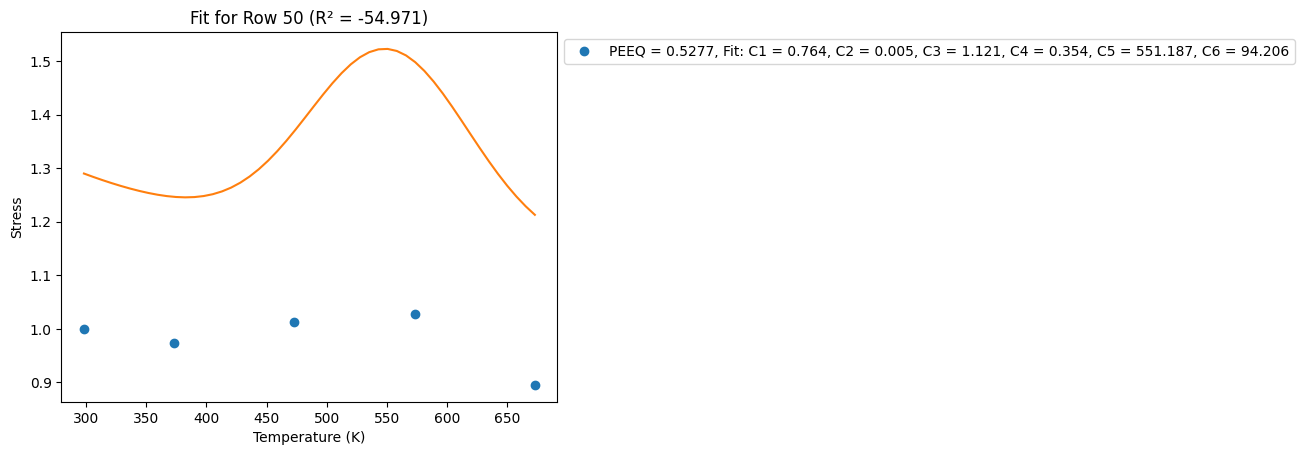

[1.         0.97423852 1.02759562 1.05729071 0.9085862 ]


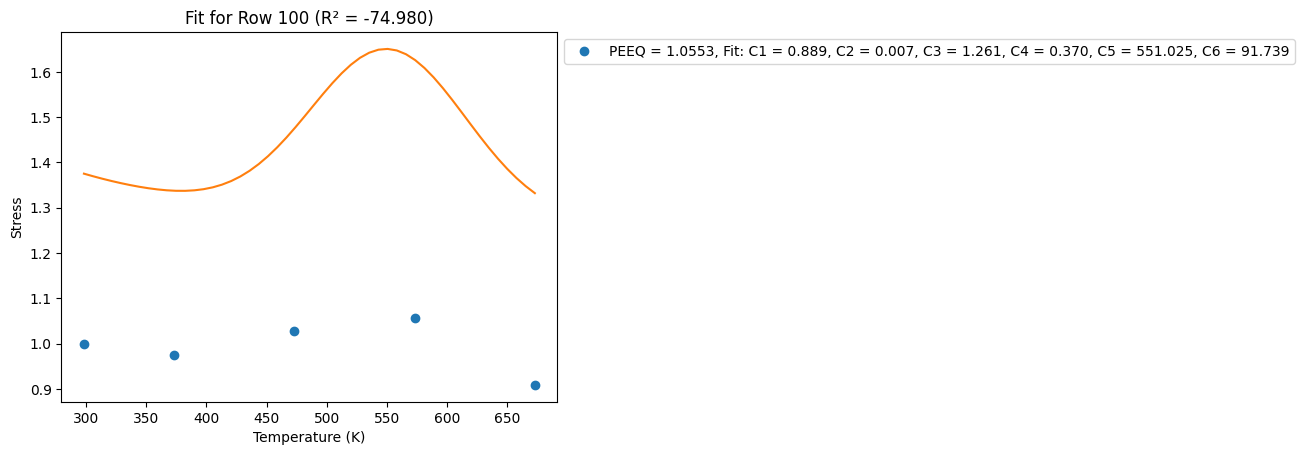

[1.         0.97698415 1.08031128 1.17071084 0.97375284]


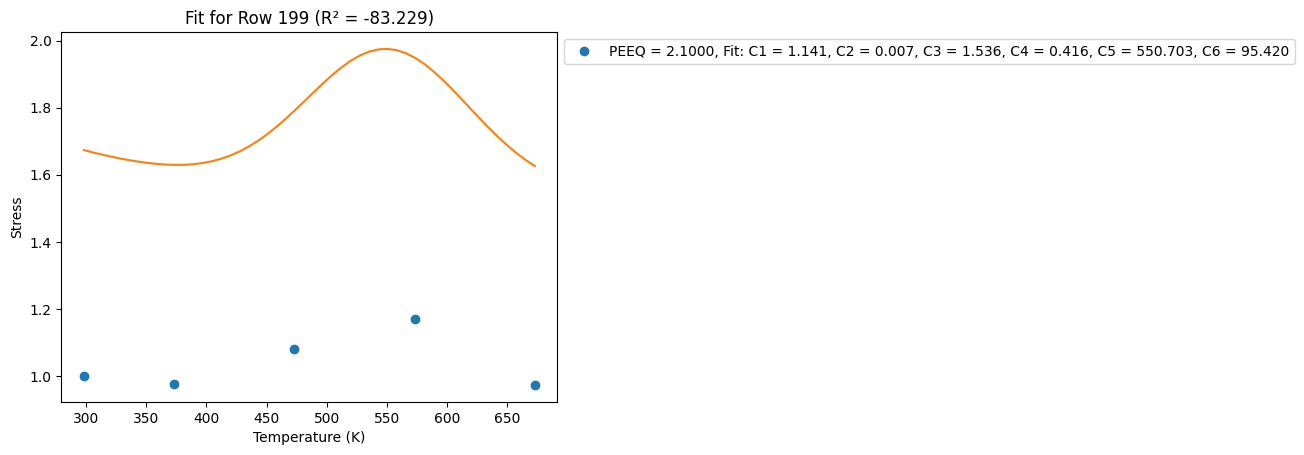

In [445]:
# Temperarute data points
T = np.array([298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.array([0, 1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 6:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)

Load data for StrRt0.01

In [446]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.01.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

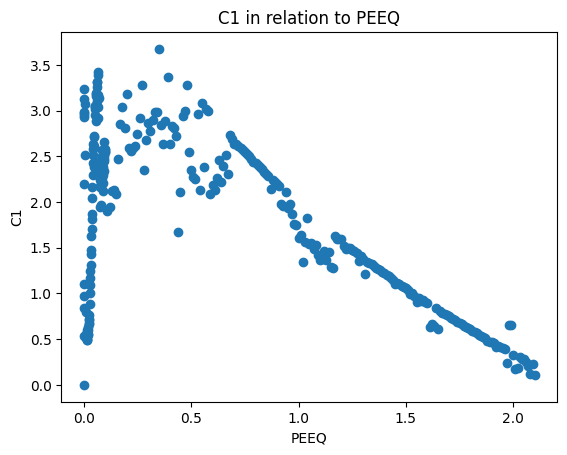

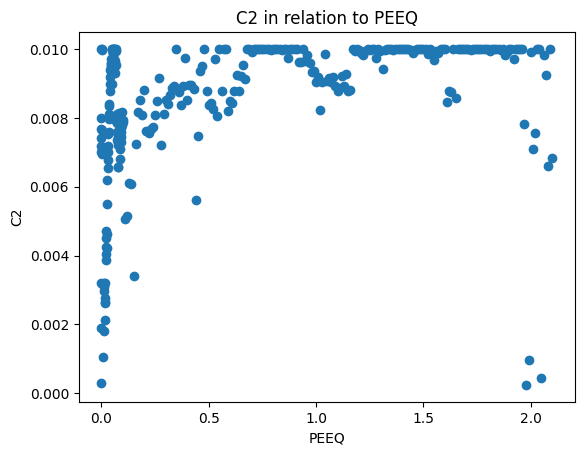

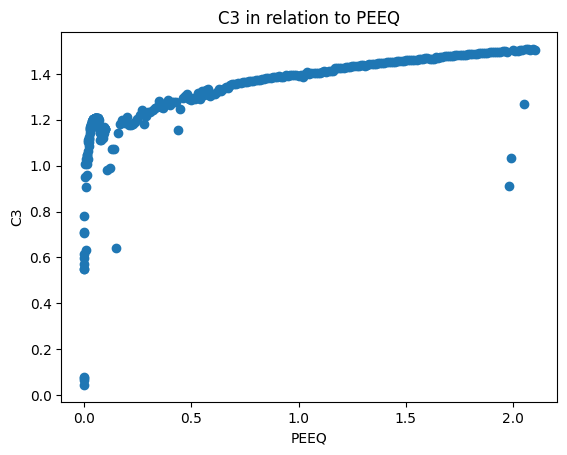

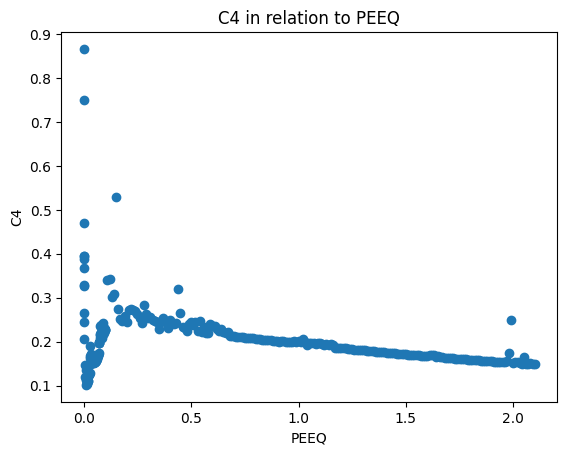

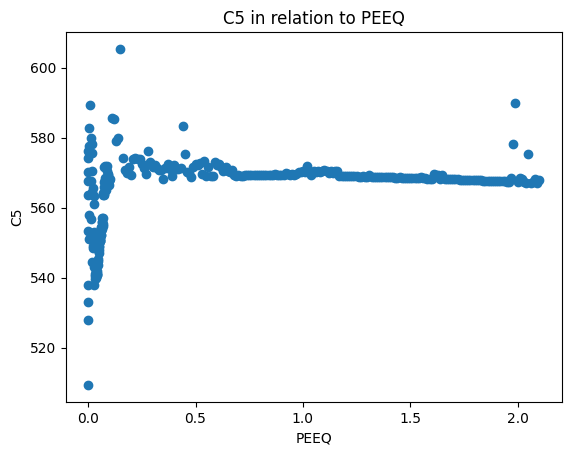

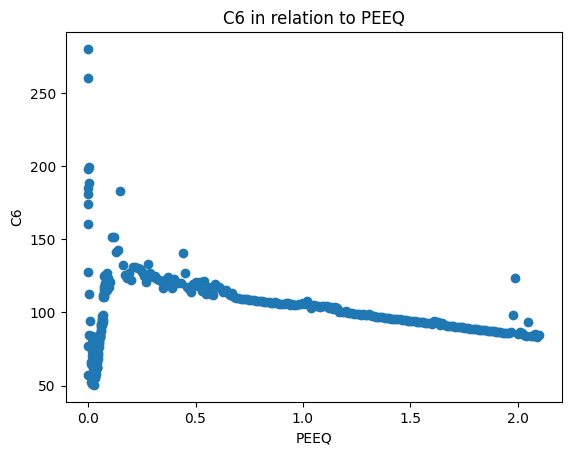

In [447]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()

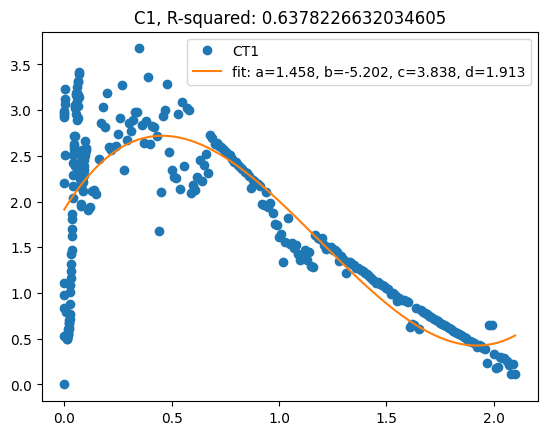

In [448]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
#initial_guess = [1.369, 5.312, 4.964, -0.218, 2.677, -5.0, -0.359, 1.942]
#param_bounds = ([0.1, 0, 0.1, -1, 0, -10, -1, 0], [10, 10, 20, 1, 10, 0, 1, 10])
initial_guess = [0.1, 0.1, 0.1, np.mean(cT1)]
param_bounds = ([-10, -10, -10, 0], [10, 10, 10, 5])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guess, bounds=param_bounds, maxfev = 1000000)
#[a, b, c, d, e, f, g ,h] = params
#para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)
[a, b, c, d] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
residuals = cT1 - cT1_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C1, R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

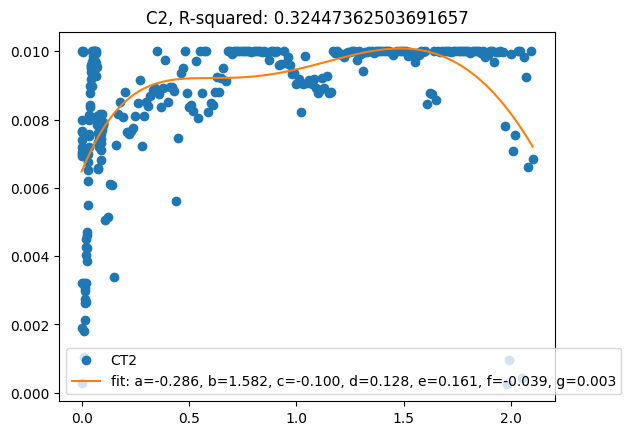

In [449]:
cT2 = data["C2"].to_numpy()
#initial_guess = [0.012, 1.366, 0.683, -0.000, 0.001]
#bounds = ([0, 1, 0.6, -0.01, -0.001], [0.05, 2, 0.8, 0.01, 0.001])
initial_guess = [-0.27, 1.25, 0.01, 0.1, 0.14, -0.02, 0.001]
bounds = ([-1, 0.5, -0.1, 0, 0, -0.1, -0.01], [0, 2, 0.1, 0.2, 0.3, 0, 0.01])

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
#[a, b, c, d, e, f] = params[0]
#para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f, g)


plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f)
residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C2, R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

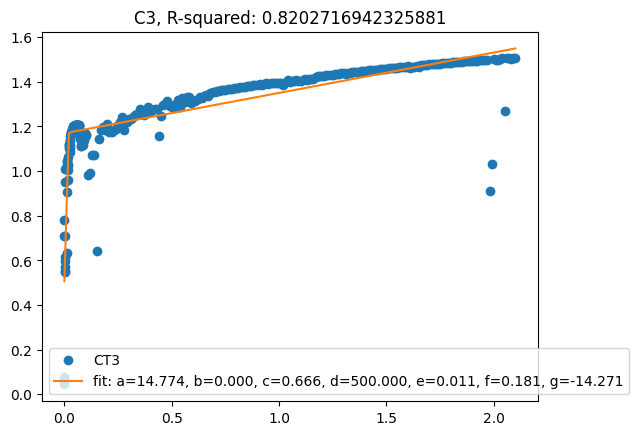

In [450]:
cT3 = data["C3"].to_numpy()
initial_guess = [15, 0.001, 0, 750, 0.02, 0.3, -15]
bounds = ([0, 0, -1, 500, 0, 0, -20], [20, 0.01, 1, 1000, 0.05, 1, 0])

params = curve_fit(cT3_func, PEEQ, cT3, p0=initial_guess,bounds=bounds, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C3, R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

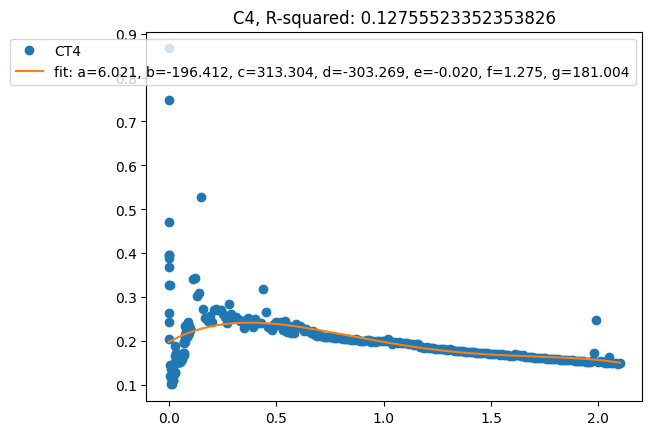

In [451]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C4, R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

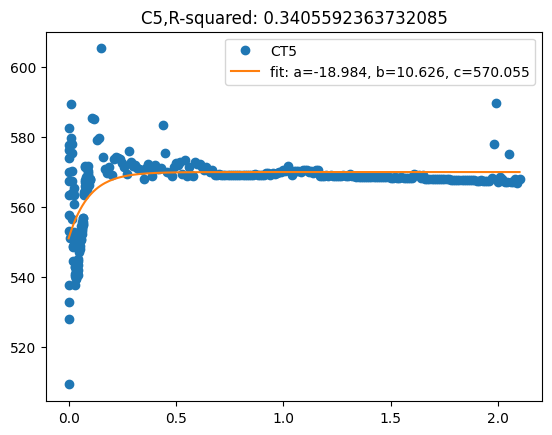

In [452]:
cT5 = data["C5"].to_numpy()
initial_guess = [580, 0.5, 500]

params = curve_fit(cT5_func, PEEQ, cT5, p0= initial_guess, maxfev = 1000000)
[a, b, c] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f' % (a, b, c)))
plt.title(f'C5,R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

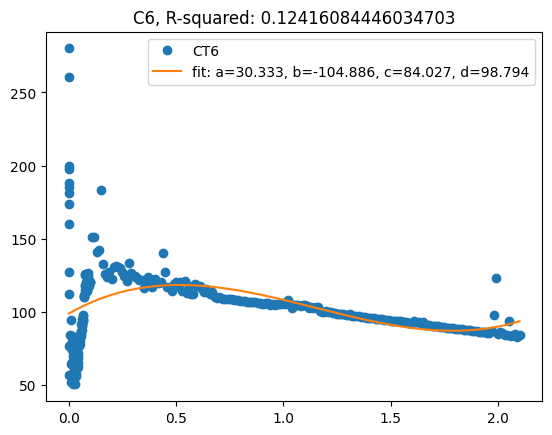

In [453]:
cT6 = data["C6"].to_numpy()
initial_guess = [1, 1, 1, 200]
bounds = ([-1e3, -1e3, -1e3, 0], [1e3, 1e3, 1e3, 1e6])

params = curve_fit(cT6_func, PEEQ, cT6, maxfev=1000000)
[a, b, c, d] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C6, R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [454]:
df_para_fit.to_csv('./para_fit_results_0.01.csv', index=False)

In [455]:
file_path = os.path.join("..", "Fitted_FC_TmpDpn_RD_StrRt0.01_ref.csv")
stress_data = pd.read_csv(file_path)

fitted_para = pd.read_csv('para_fit_results_0.01.csv')

[1.         2.02619363 2.07201306 2.39844312 1.24560579]


C:\Users\socca\AppData\Local\Temp\ipykernel_37396\3597178534.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


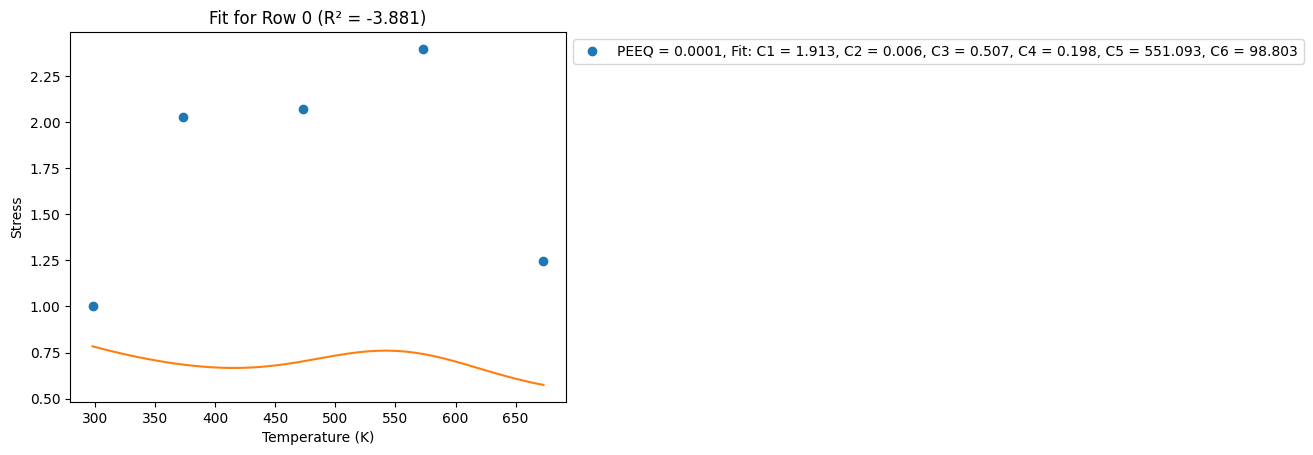

[1.         1.81044844 1.86820083 2.03326471 1.40985254]


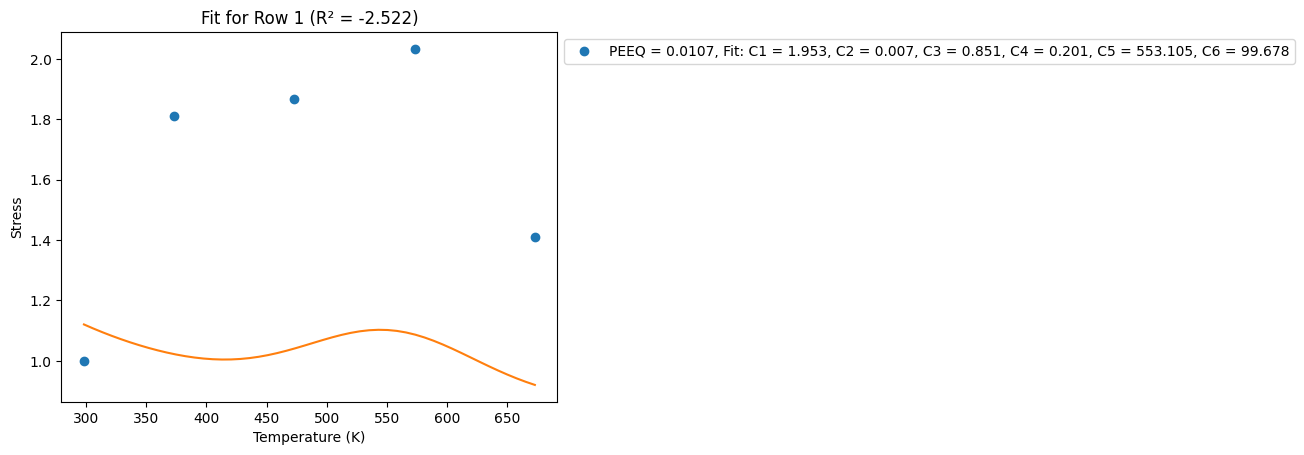

[1.         1.26877055 1.33667707 1.43572732 1.06905351]


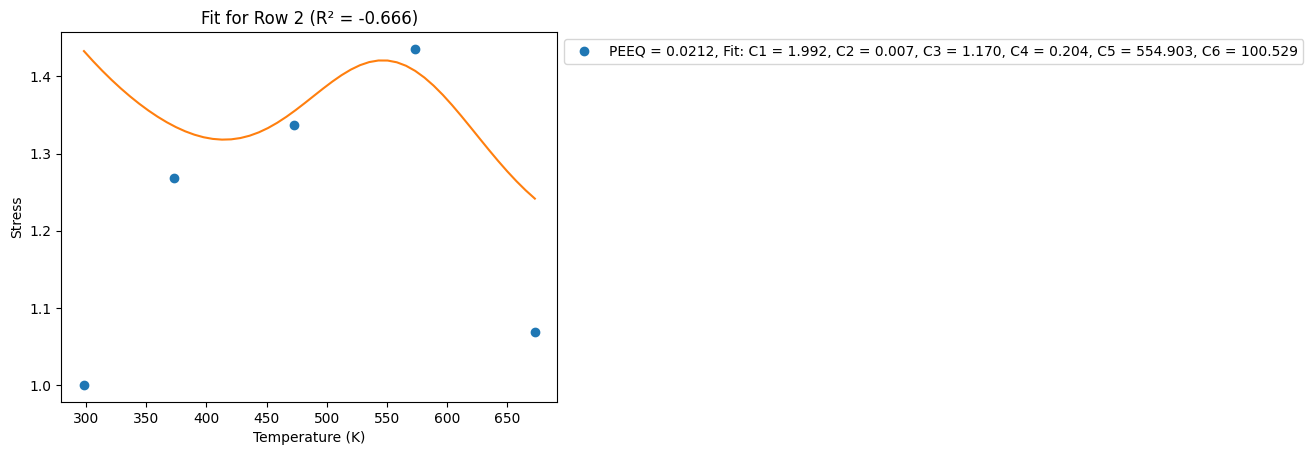

[1.         1.07203761 1.14366857 1.21829011 0.95238317]


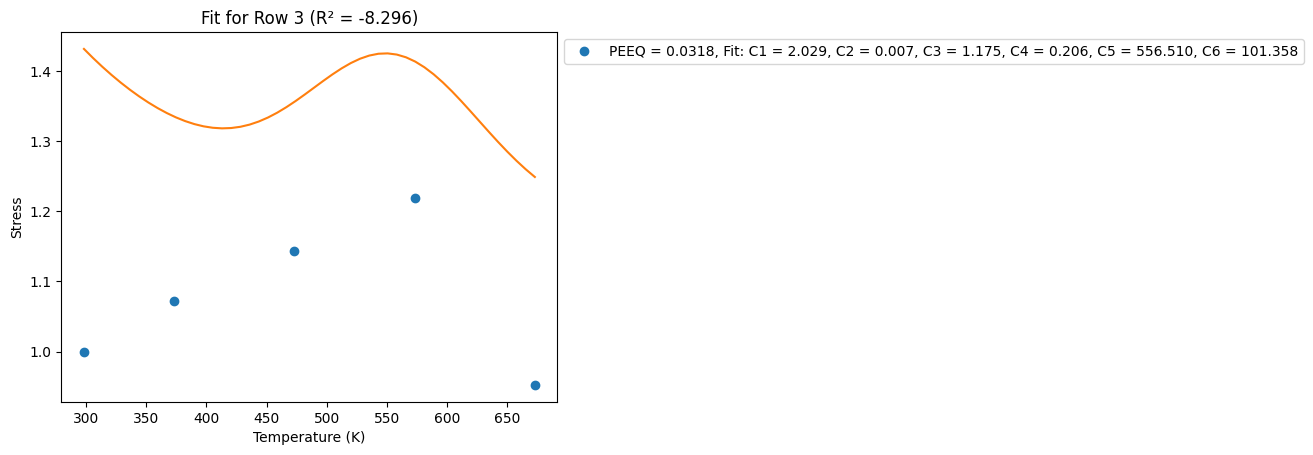

[1.         0.98984412 1.06366765 1.12652527 0.91082877]


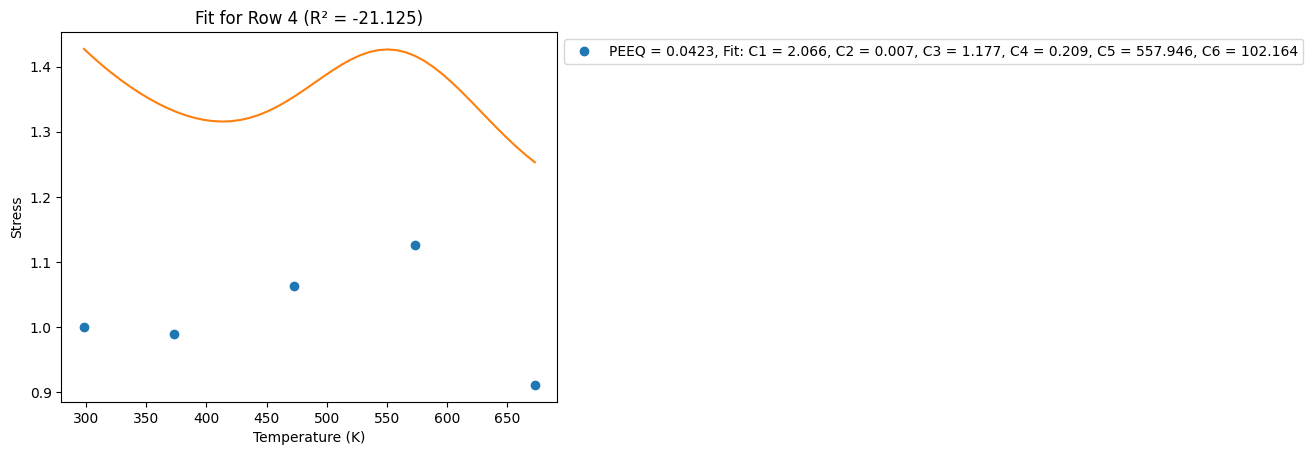

[1.         0.95070701 1.02600689 1.08173845 0.89670721]


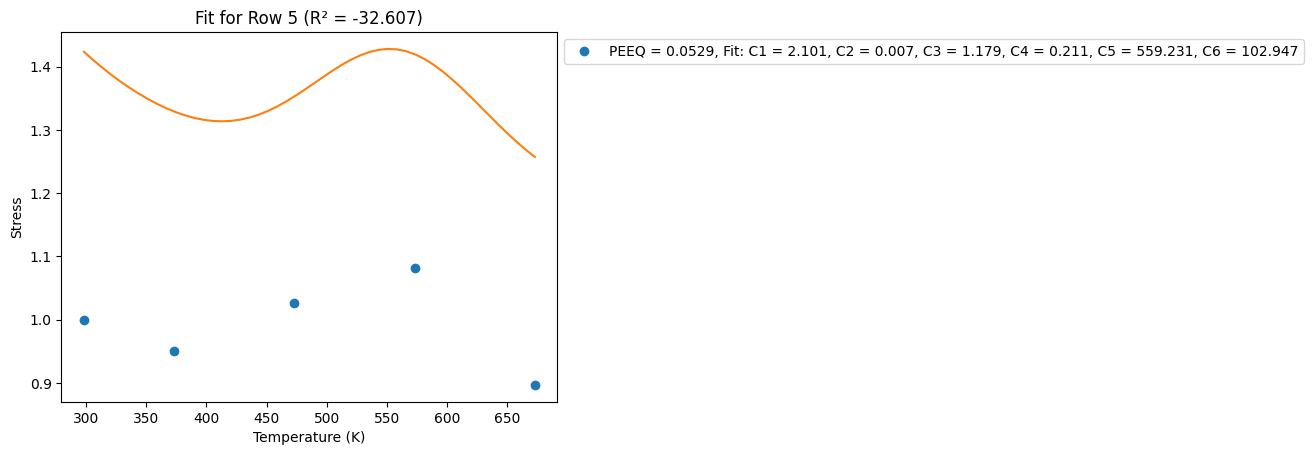

[1.         0.93092146 1.00711694 1.05791281 0.8938835 ]


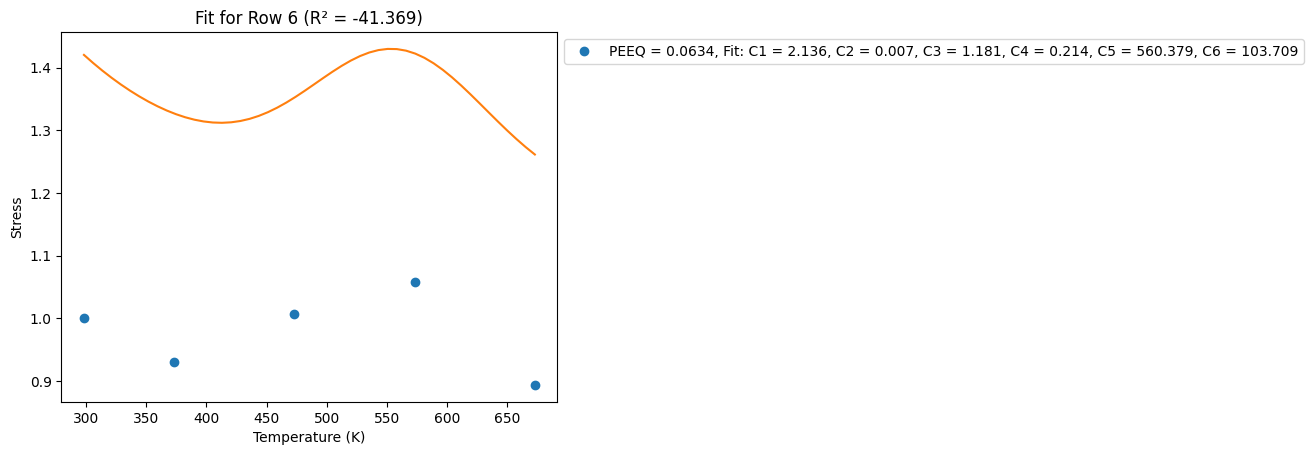

[1.         0.9111475  0.9862864  1.02623115 0.9061301 ]


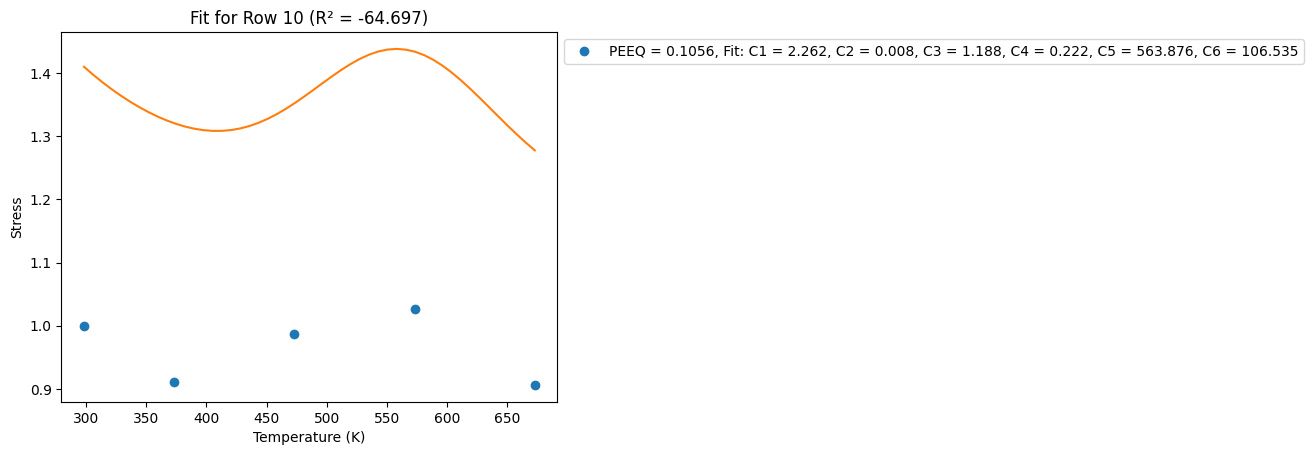

[1.         0.91523706 0.97364793 1.00738126 0.91596377]


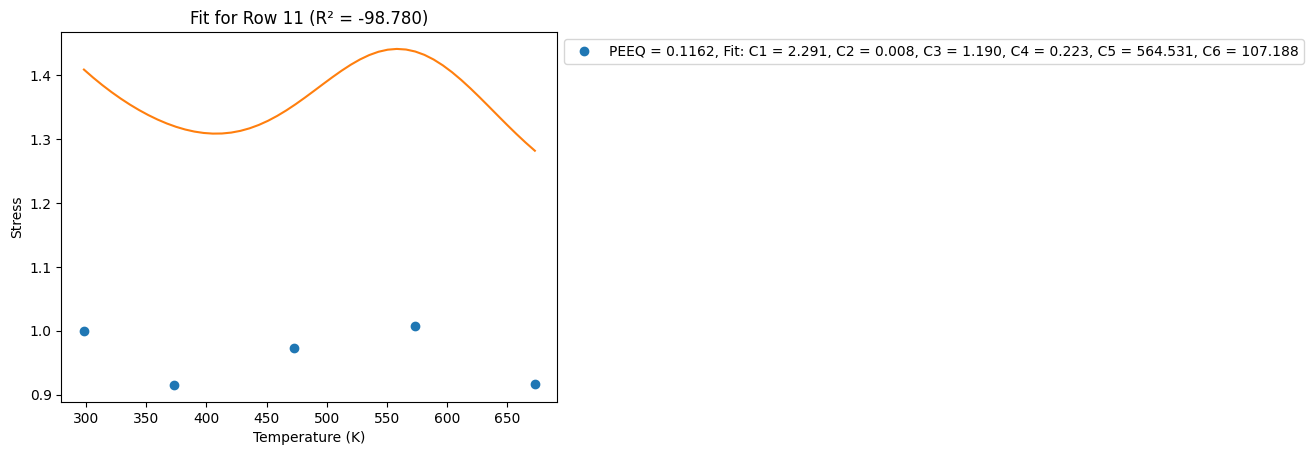

[1.         0.94201211 0.95228069 0.99360076 0.90348225]


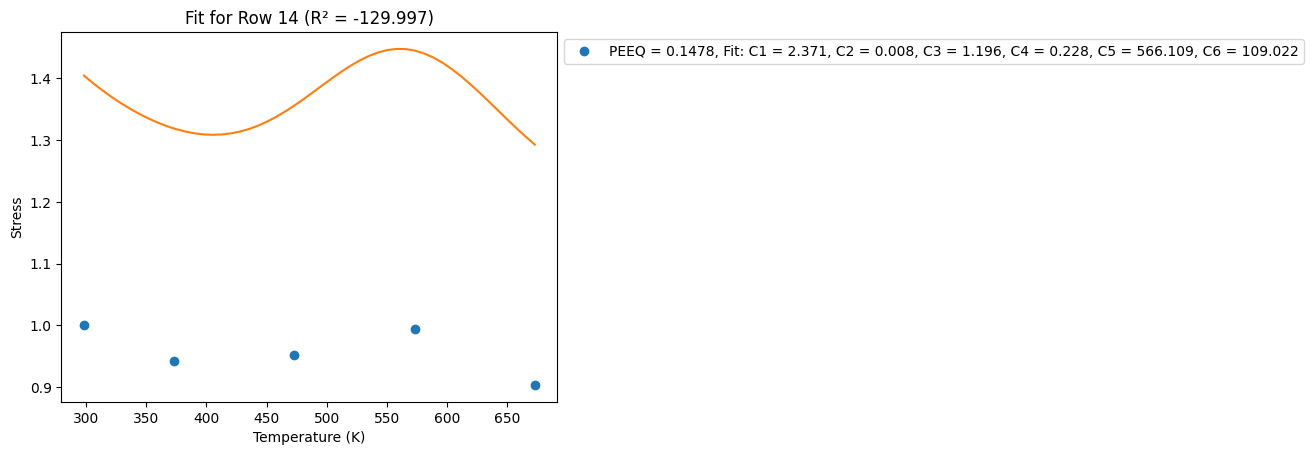

[1.         0.96431532 0.94330236 0.98818322 0.89391713]


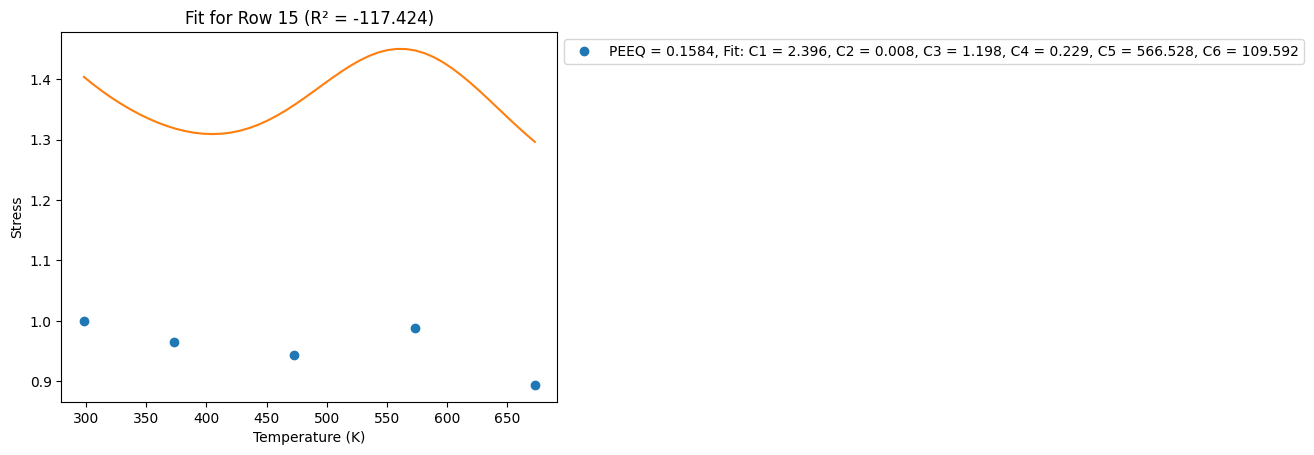

[1.         0.96711293 0.94281453 0.98703263 0.8910996 ]


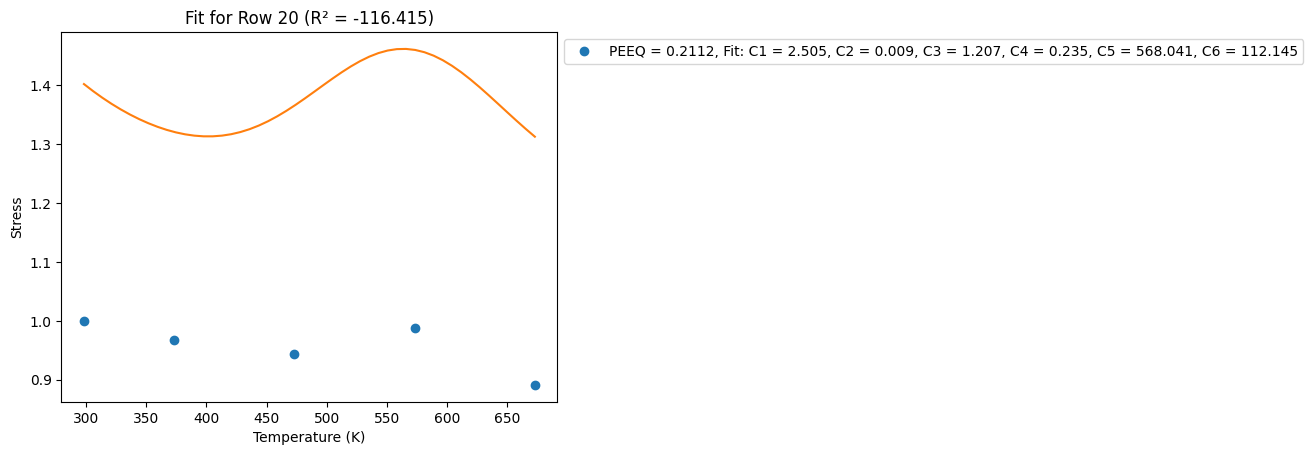

[1.         0.96327722 0.94417814 0.98739581 0.89062358]


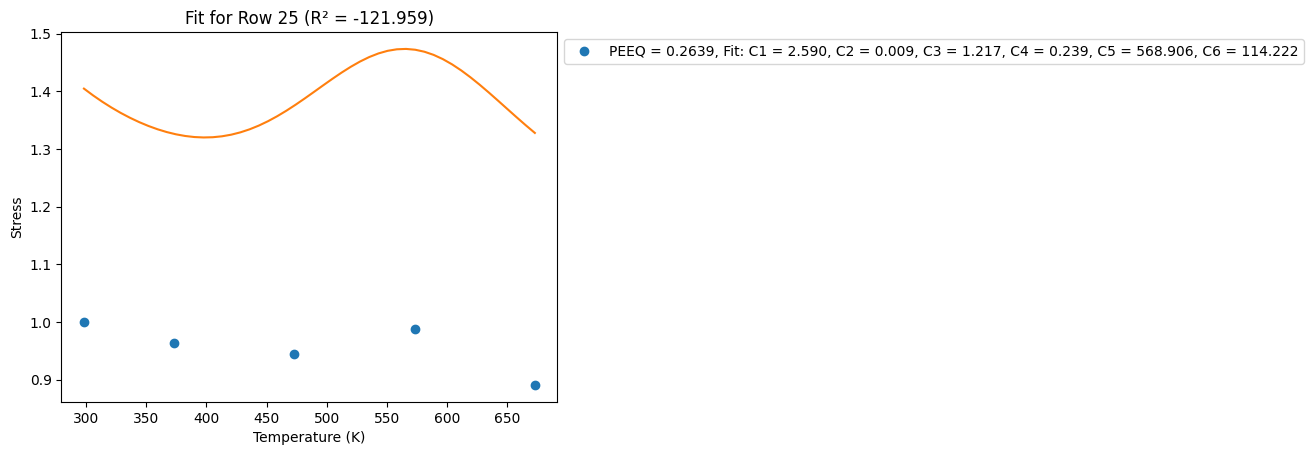

[1.         0.9580763  0.94582069 0.98838105 0.89114005]


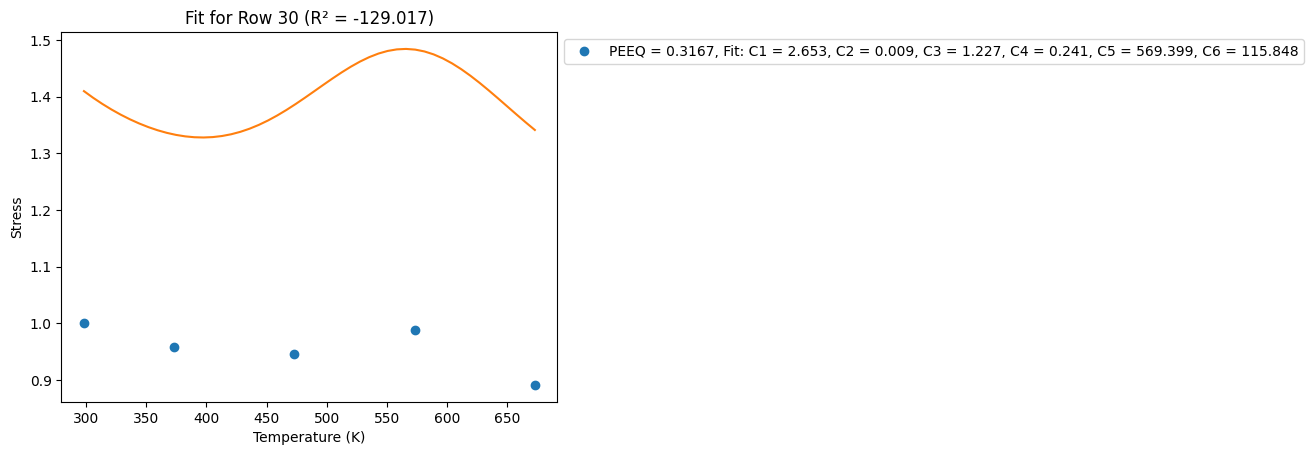

[1.         0.95323872 0.94732053 0.98963638 0.89212509]


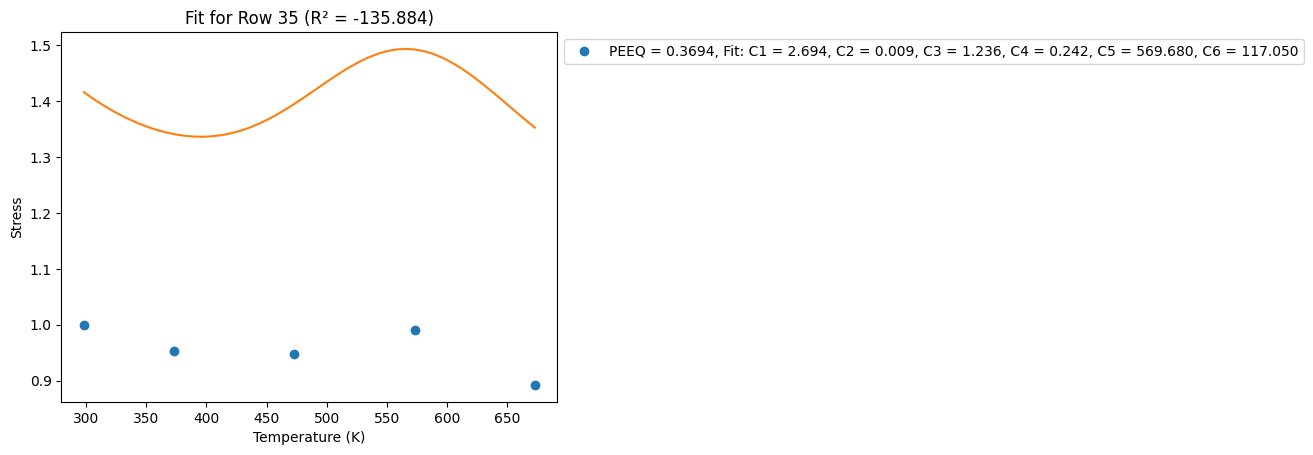

[1.         0.94918324 0.94858857 0.99100439 0.89334125]


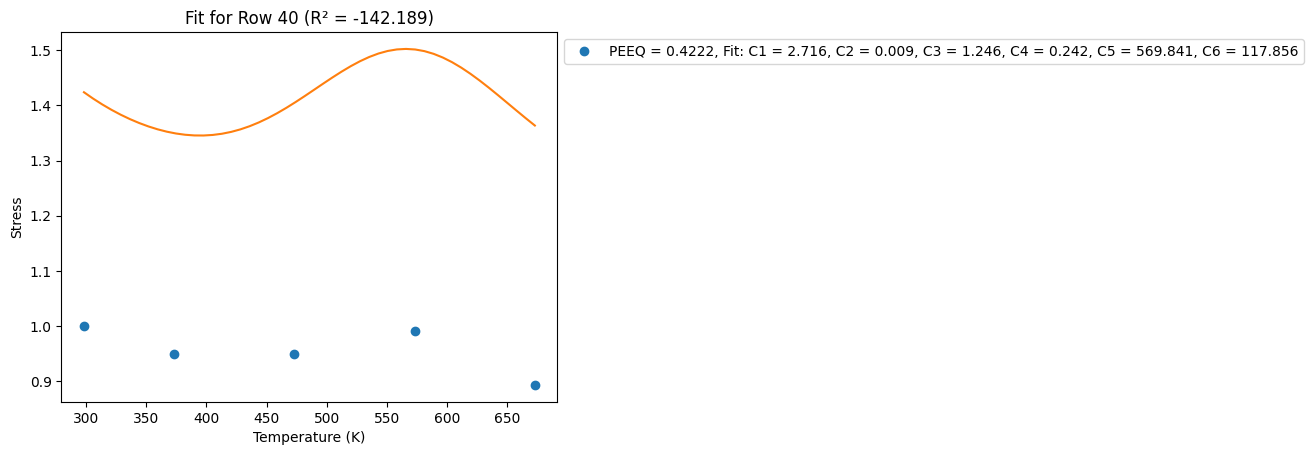

[1.         0.9458992  0.94963814 0.99240862 0.89466951]


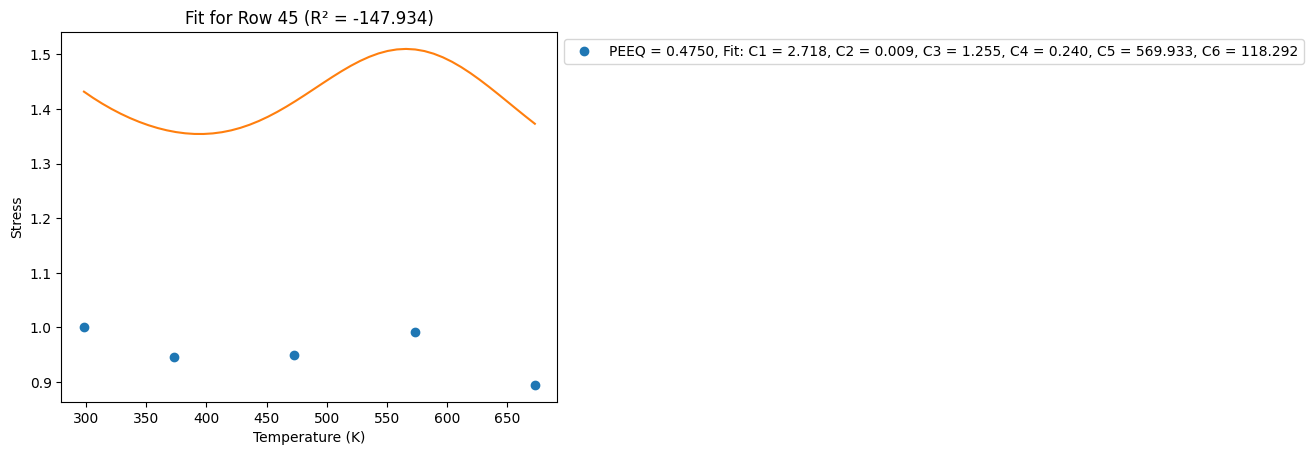

[1.         0.9432639  0.95051004 0.9938101  0.89604609]


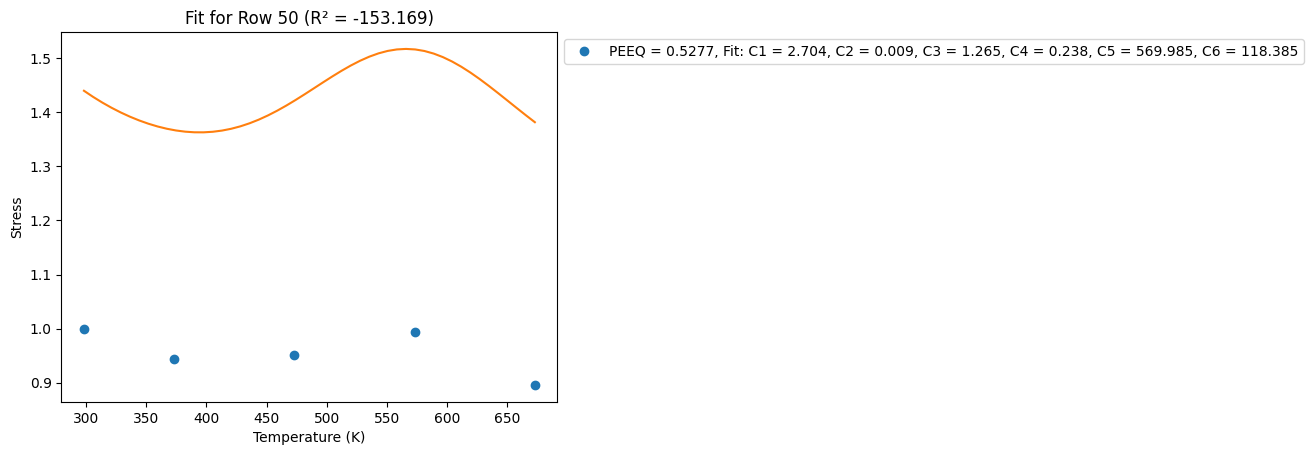

[1.         0.93341694 0.95572646 1.00588746 0.90886   ]


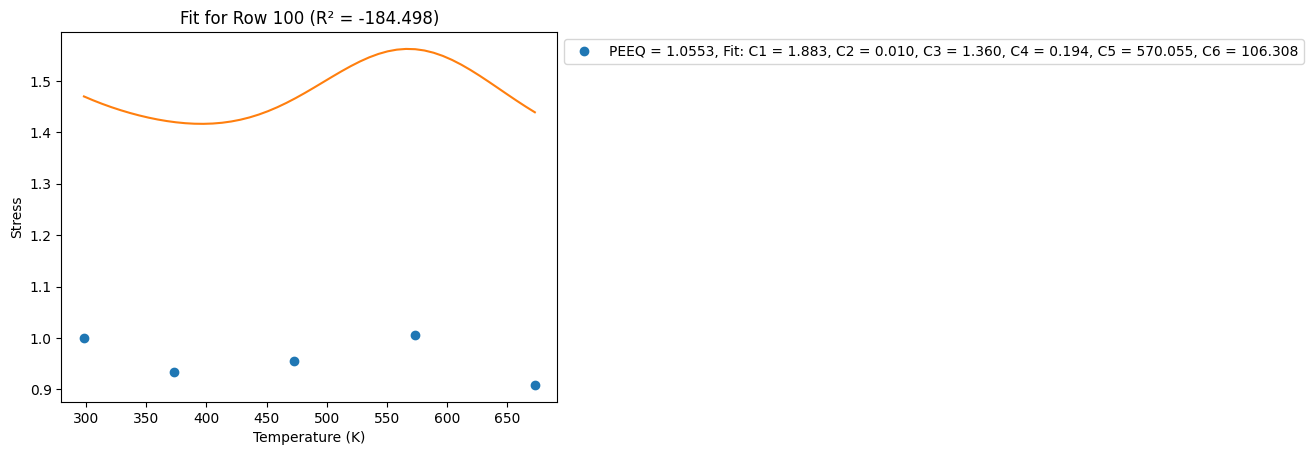

[1.         0.96959453 1.00093883 1.06841925 0.98375995]


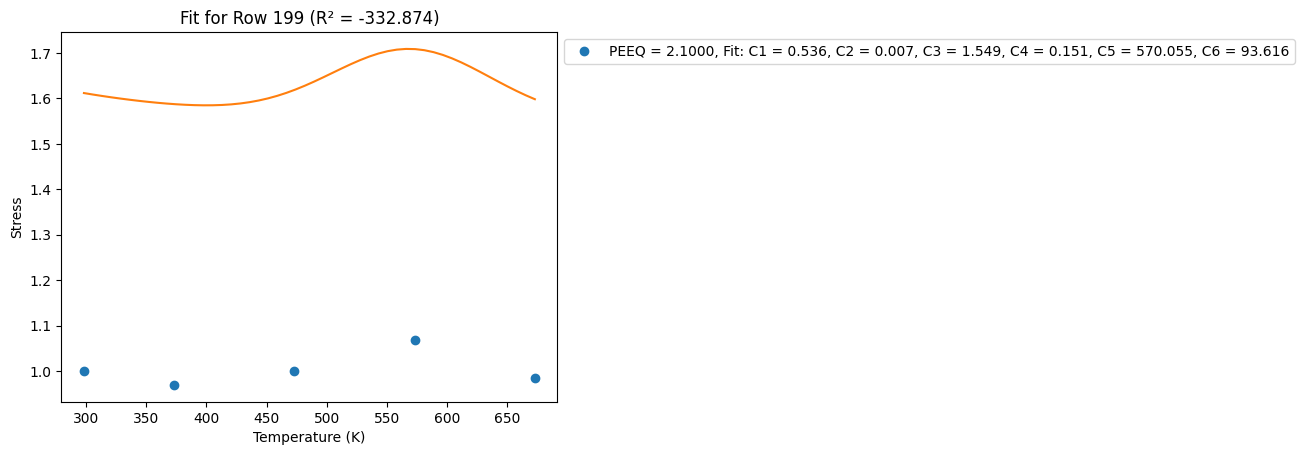

In [456]:
# Temperarute data points
T = np.array([298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.array([0, 1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 6:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)

Load data for StrRt0.1

In [457]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.1.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

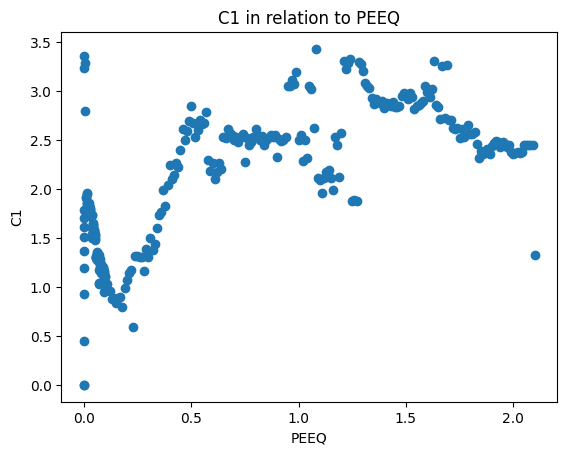

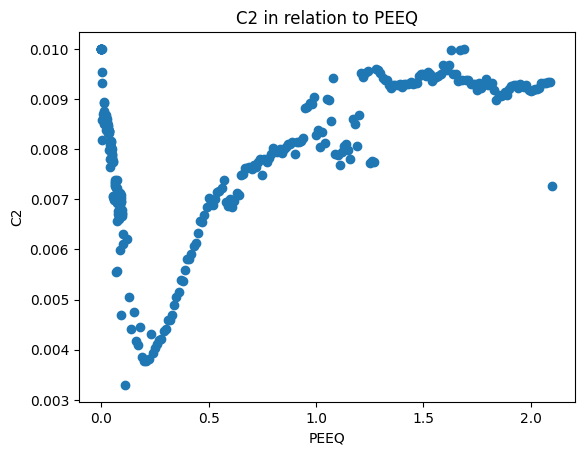

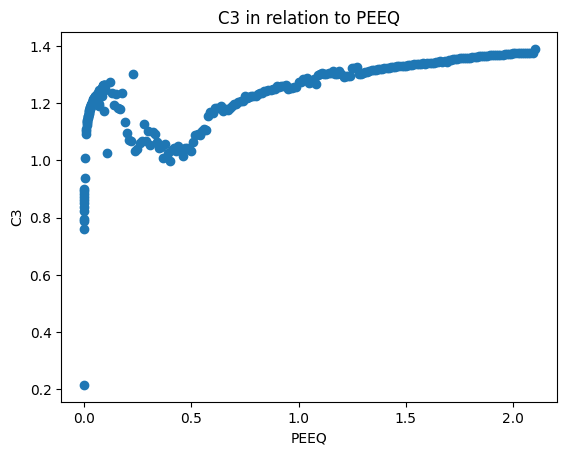

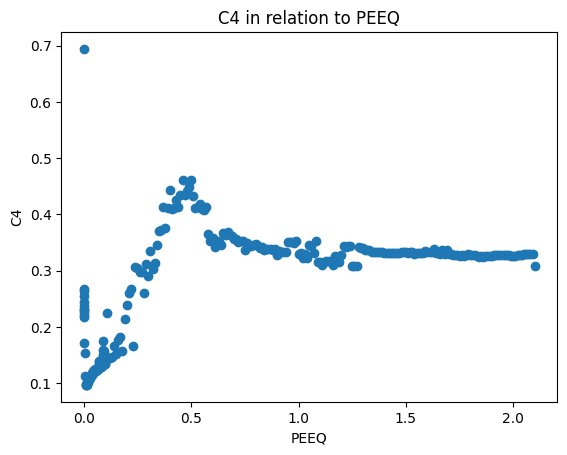

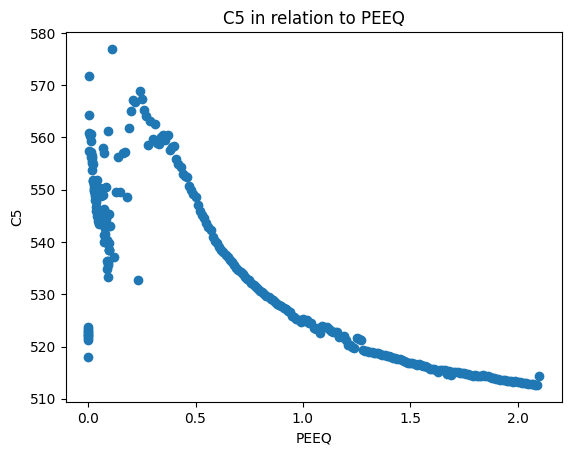

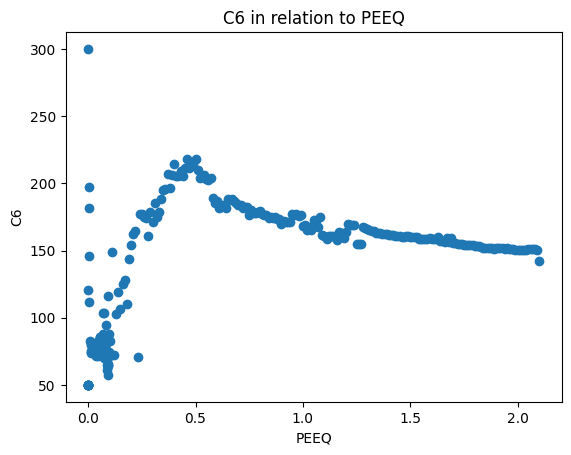

In [458]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()

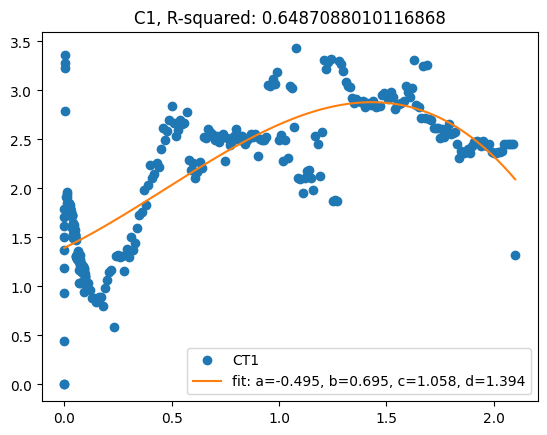

In [ ]:
df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])

cT1 = data["C1"].to_numpy()
#initial_guess = [1.369, 5.312, 4.964, -0.218, 2.677, -5.0, -0.359, 1.942]
#param_bounds = ([0.1, 0, 0.1, -1, 0, -10, -1, 0], [10, 10, 20, 1, 10, 0, 1, 10])
initial_guess = [1, 1, 1, 1]
param_bounds = ([-10, -10, -10, -10], [10, 10, 10, 10])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guess, bounds=param_bounds, maxfev = 1000000)
#[a, b, c, d, e, f, g ,h] = params
#para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)
[a, b, c, d] = params
para_fit = cT1_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
residuals = cT1 - cT1_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C1, R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

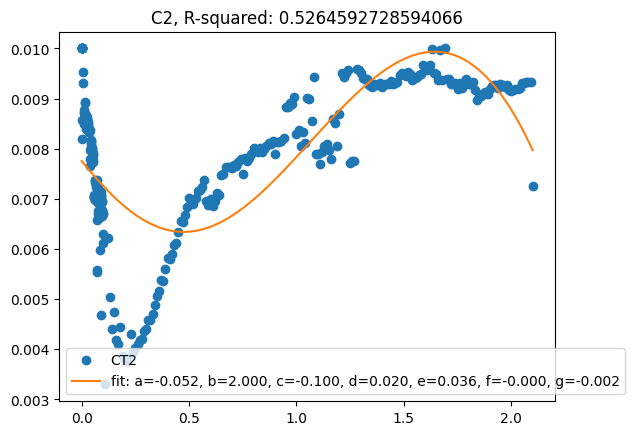

In [460]:
cT2 = data["C2"].to_numpy()
#initial_guess = [0.012, 1.366, 0.683, -0.000, 0.001]
#bounds = ([0, 1, 0.6, -0.01, -0.001], [0.05, 2, 0.8, 0.01, 0.001])
initial_guess = [-0.27, 1.25, 0.01, 0.1, 0.14, -0.02, 0.001]
bounds = ([-1, 0.5, -0.1, 0, 0, -0.1, -0.01], [0, 2, 0.1, 0.2, 0.3, 0, 0.01])

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
#[a, b, c, d, e, f] = params[0]
#para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f, g)


plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
#residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f)
residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C2, R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

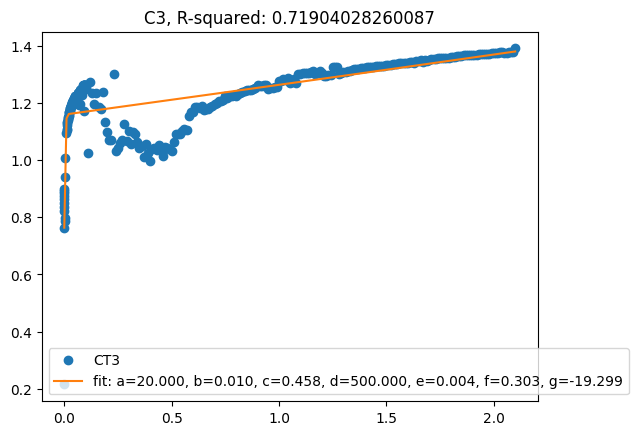

In [461]:
cT3 = data["C3"].to_numpy()
initial_guess = [15, 0.001, 0, 750, 0.02, 0.3, -15]
bounds = ([0, 0, -1, 500, 0, 0, -20], [20, 0.01, 1, 1000, 0.05, 1, 0])

params = curve_fit(cT3_func, PEEQ, cT3, p0=initial_guess,bounds=bounds, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT3_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT3, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT3 - cT3_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT3', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C3, R-squared: {r_squared}')
plt.show()
df_para_fit['CT3'] = para_fit

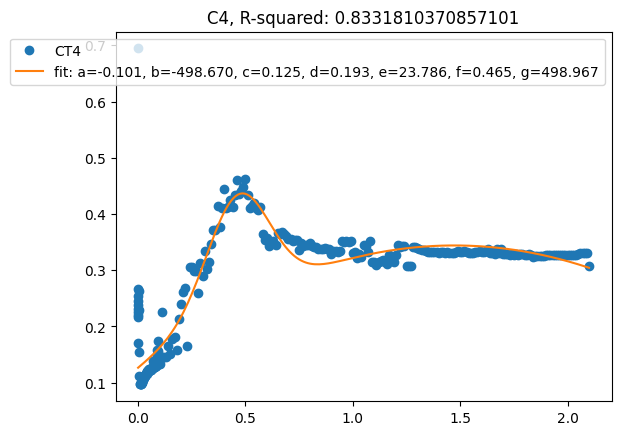

In [462]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT4_func(PEEQ_fit, a, b, c, d, e, f, g)

plotObjects = plt.plot(PEEQ, cT4, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT4 - cT4_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT4', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C4, R-squared: {r_squared}')
plt.show()
df_para_fit['CT4'] = para_fit

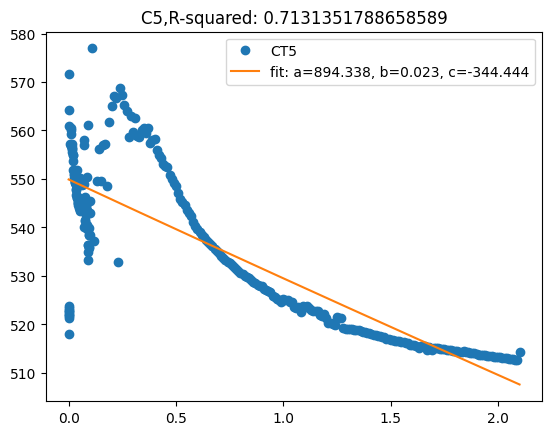

In [463]:
cT5 = data["C5"].to_numpy()
initial_guess = [580, 0.5, 500]

params = curve_fit(cT5_func, PEEQ, cT5, p0= initial_guess, maxfev = 1000000)
[a, b, c] = params[0]
para_fit = cT5_func(PEEQ_fit, a, b, c)

plotObjects = plt.plot(PEEQ, cT5, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT5 - cT5_func(PEEQ, a, b, c)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT5', 'fit: a=%5.3f, b=%5.3f, c=%5.3f' % (a, b, c)))
plt.title(f'C5,R-squared: {r_squared}')
plt.show()
df_para_fit['CT5'] = para_fit

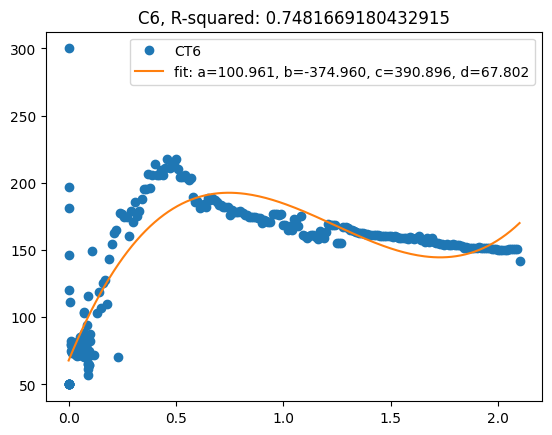

In [464]:
cT6 = data["C6"].to_numpy()
initial_guess = [1, 1, 1, 200]
bounds = ([-1e3, -1e3, -1e3, 0], [1e3, 1e3, 1e3, 1e6])

params = curve_fit(cT6_func, PEEQ, cT6, maxfev=1000000)
[a, b, c, d] = params[0]
para_fit = cT6_func(PEEQ_fit, a, b, c, d)

plotObjects = plt.plot(PEEQ, cT6, 'o', PEEQ_fit, para_fit)

# Calculate R-squared
residuals = cT6 - cT6_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
plt.legend(iter(plotObjects), ('CT6', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C6, R-squared: {r_squared}')
plt.show()
df_para_fit['CT6'] = para_fit

In [465]:
df_para_fit.to_csv('./para_fit_results_0.1.csv', index=False)

In [466]:
file_path = os.path.join("..", "Fitted_FC_TmpDpn_RD_StrRt0.1_ref.csv")
stress_data = pd.read_csv(file_path)

fitted_para = pd.read_csv('para_fit_results_0.1.csv')

[1.         1.42539053 1.77206185 1.75770822 1.35788635]


C:\Users\socca\AppData\Local\Temp\ipykernel_37396\3597178534.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


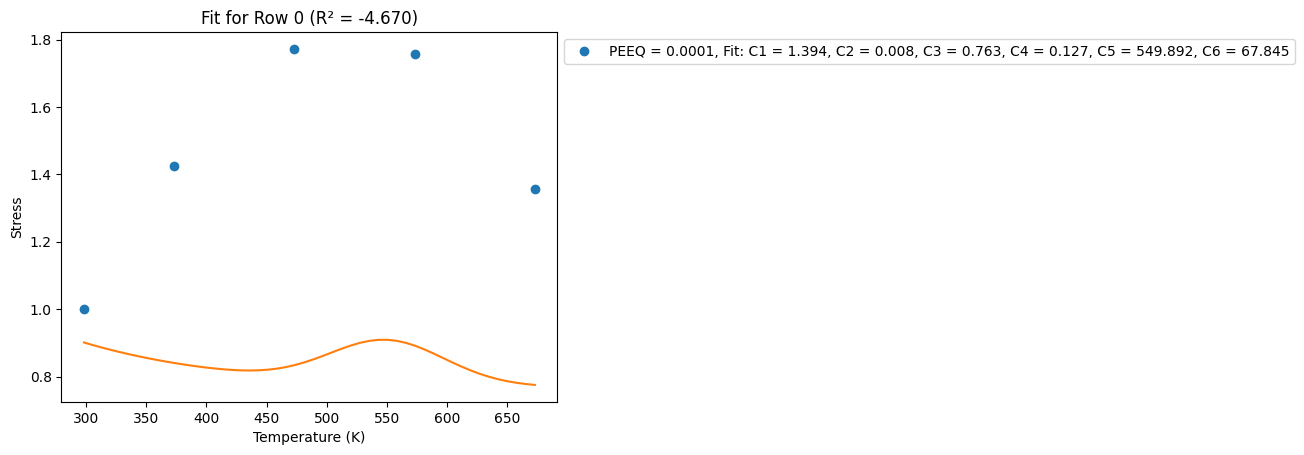

[1.         1.27155229 1.48634733 1.46064979 1.27144499]


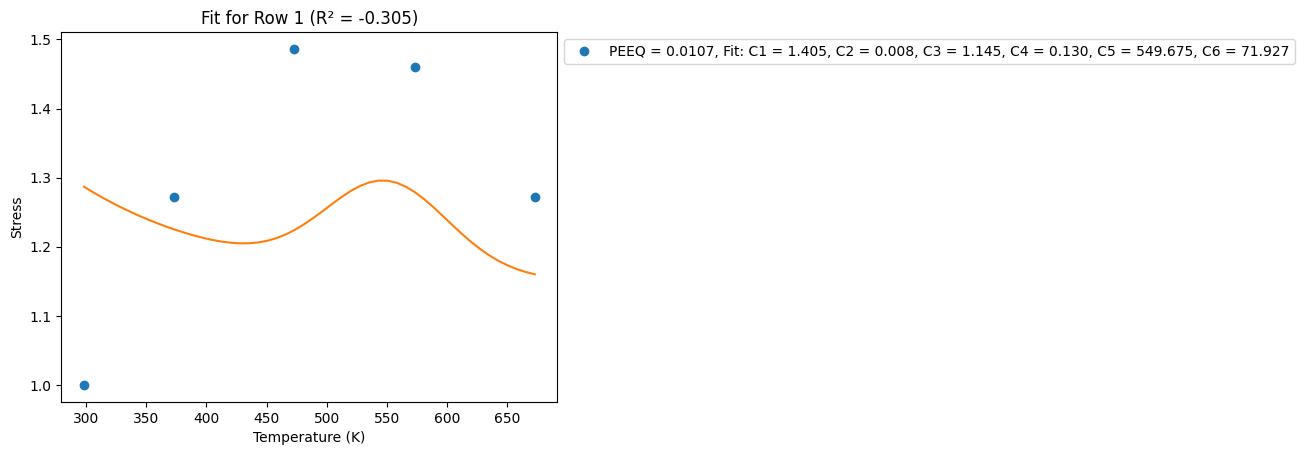

[1.         1.04152692 1.19222648 1.16998563 1.04308288]


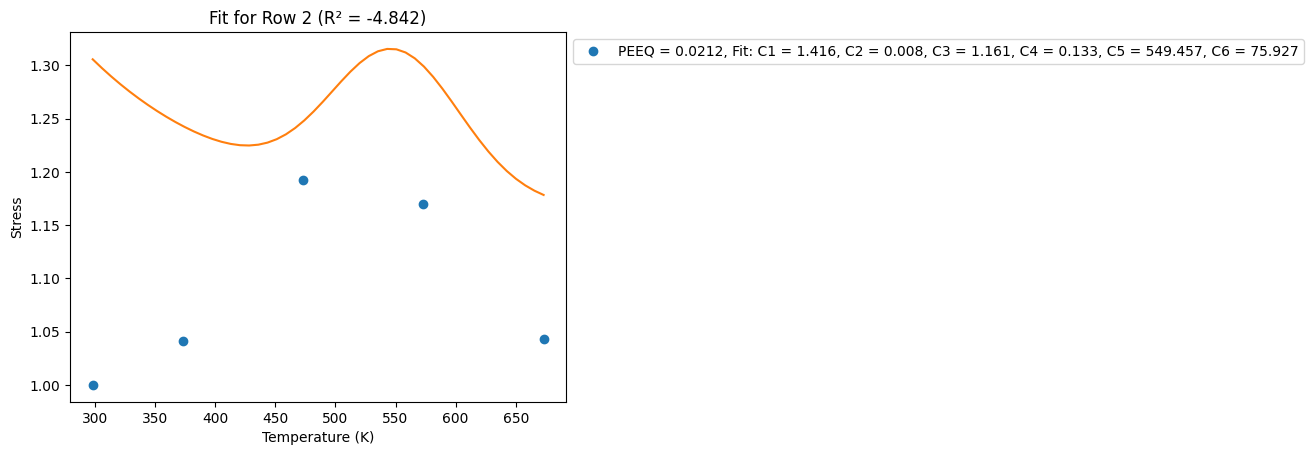

[1.         0.97441483 1.0989452  1.07870104 0.97456275]


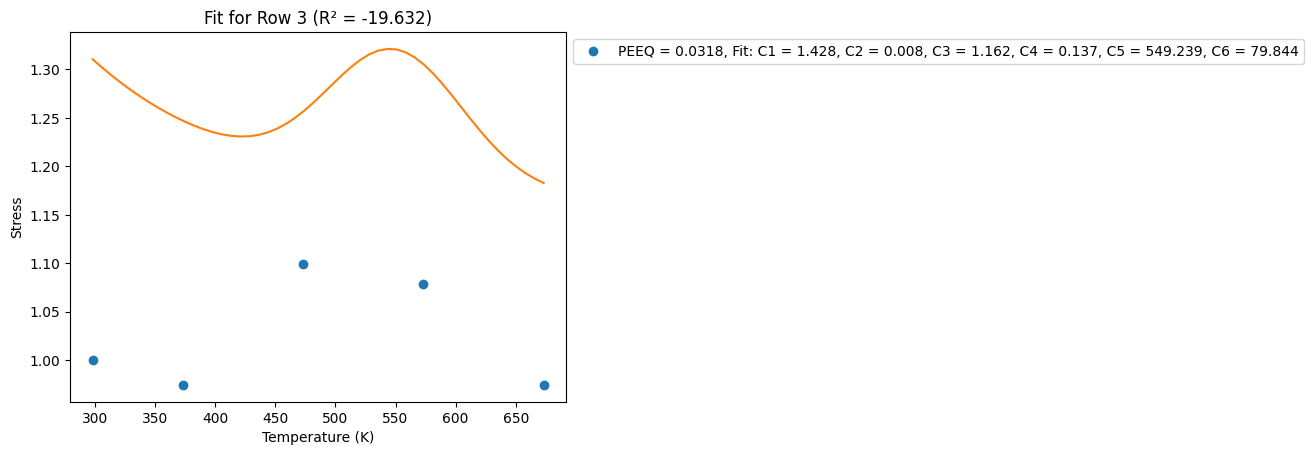

[1.         0.95129448 1.06141373 1.04286739 0.94953127]


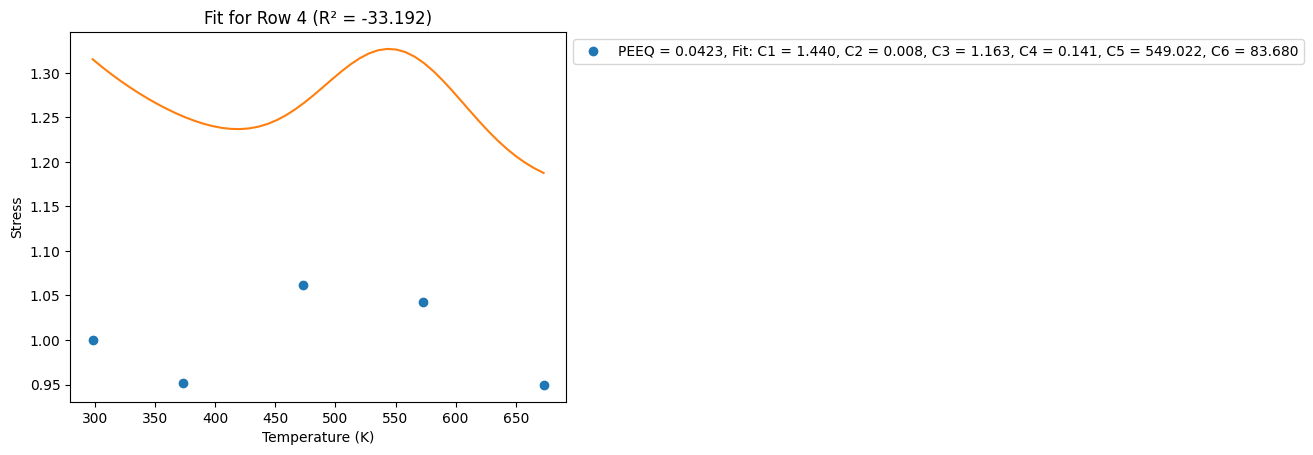

[1.         0.94084896 1.04094007 1.02405062 0.93713701]


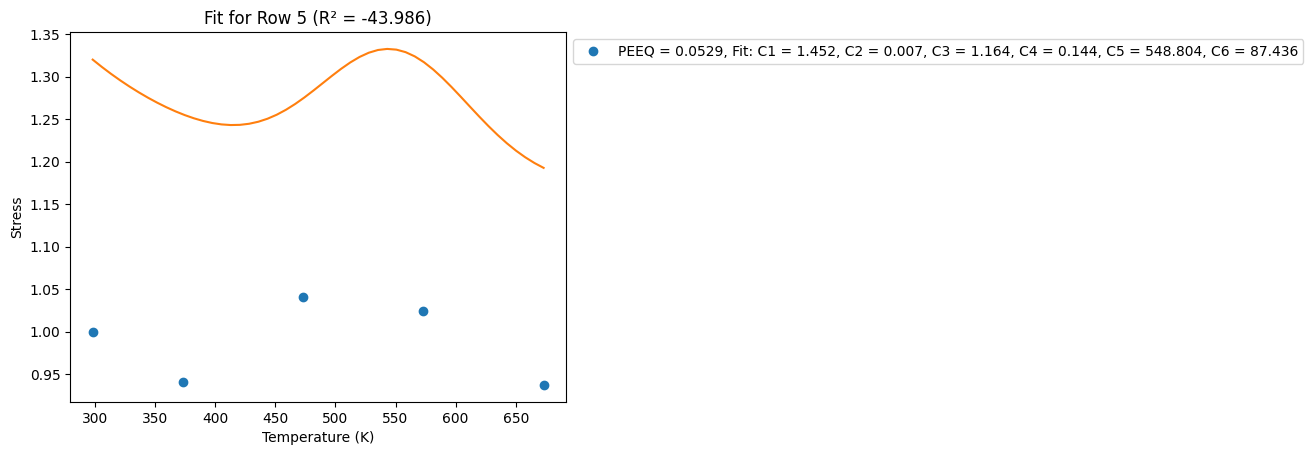

[1.         0.93495269 1.02721912 1.01196636 0.92936991]


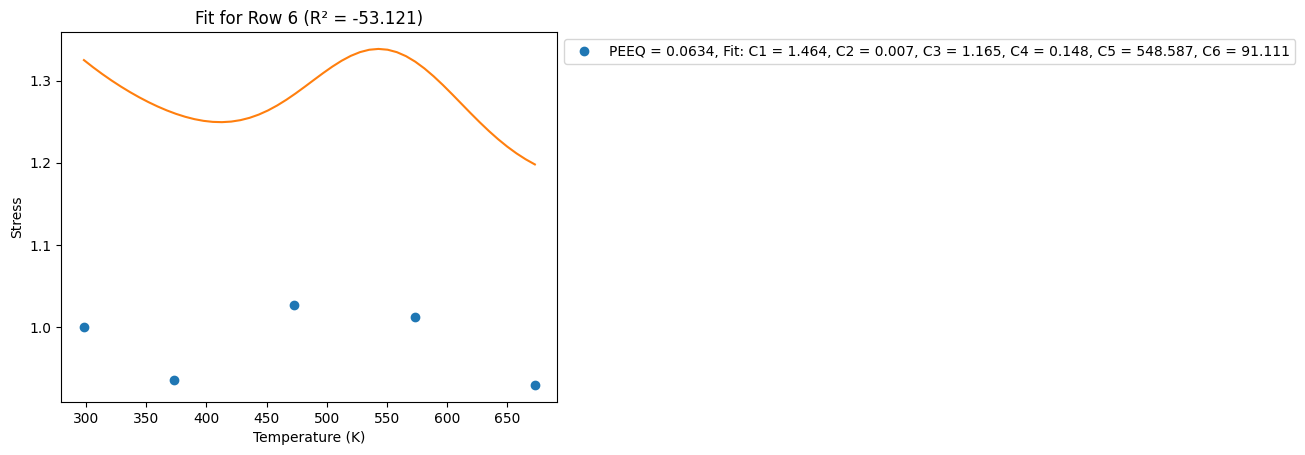

[1.         0.92495559 0.9959403  0.98681079 0.91295289]


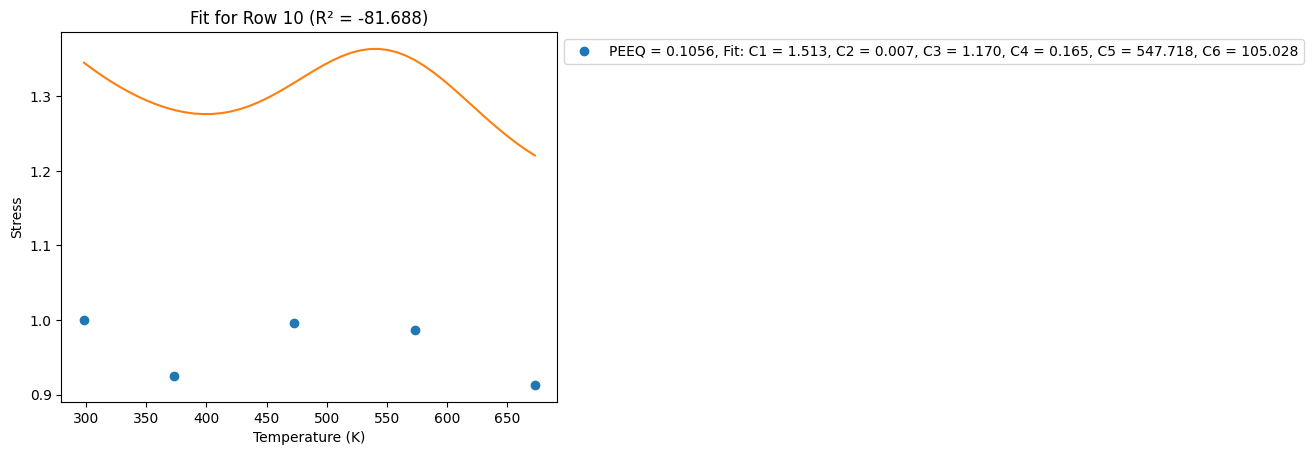

[1.         0.9226709  0.96485411 0.96779758 0.8997838 ]


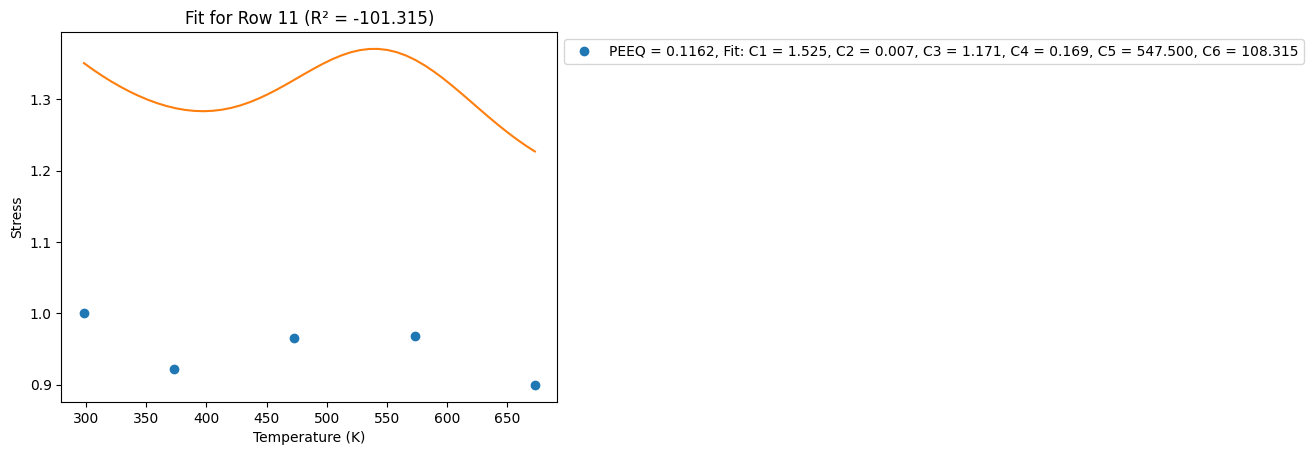

[1.         0.93495345 0.94121417 0.96496113 0.89728977]


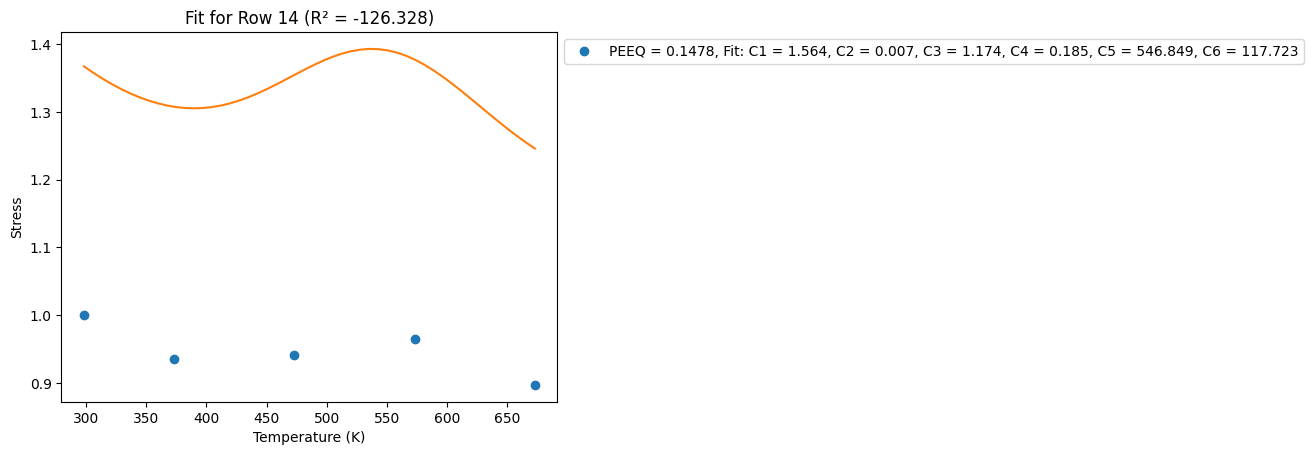

[1.         0.94512104 0.93549944 0.97178127 0.90100152]


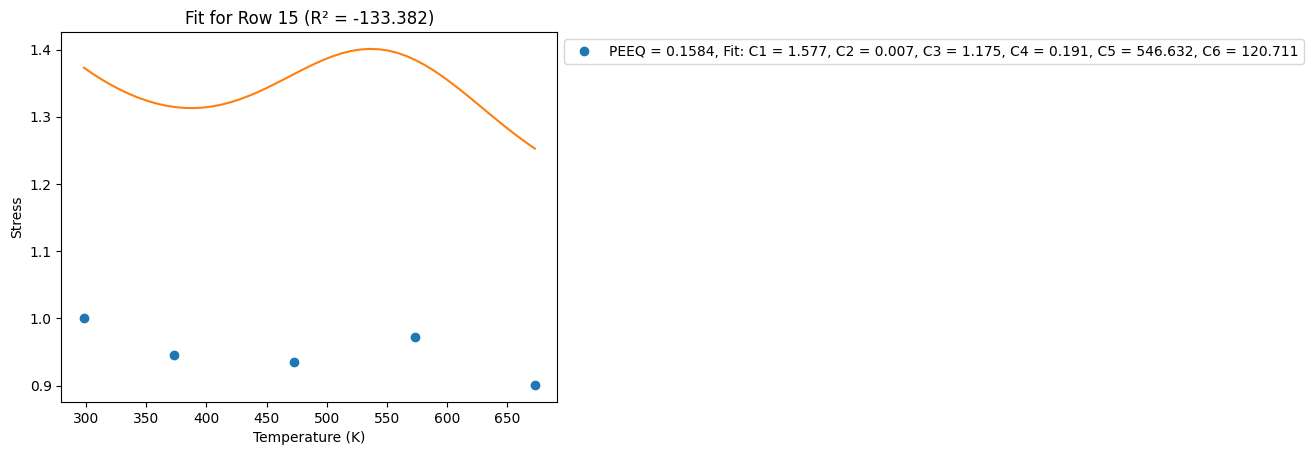

[1.         0.94786079 0.93713997 0.9753161  0.90228363]


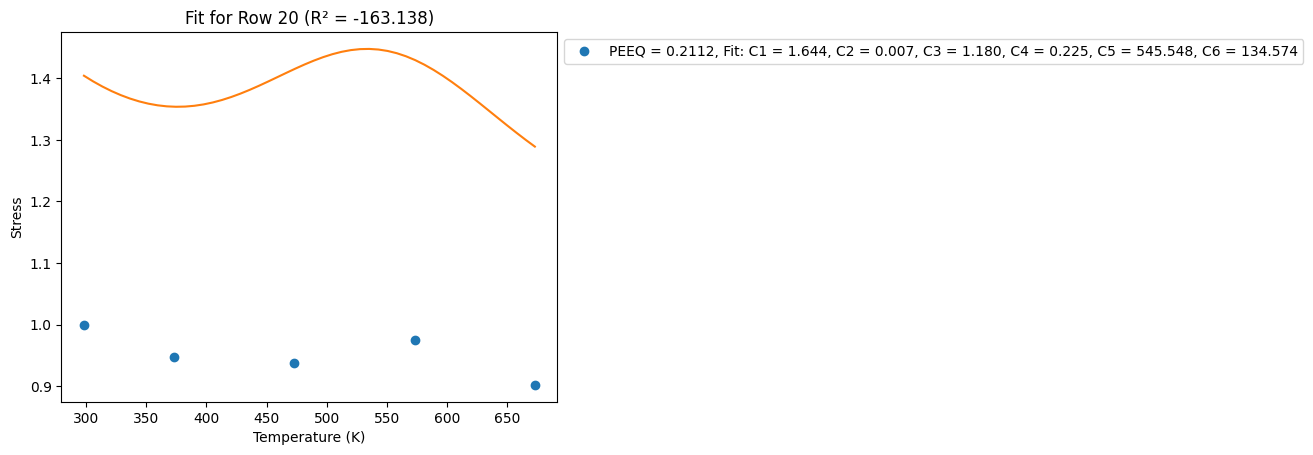

[1.         0.94875403 0.94114362 0.97700899 0.90243077]


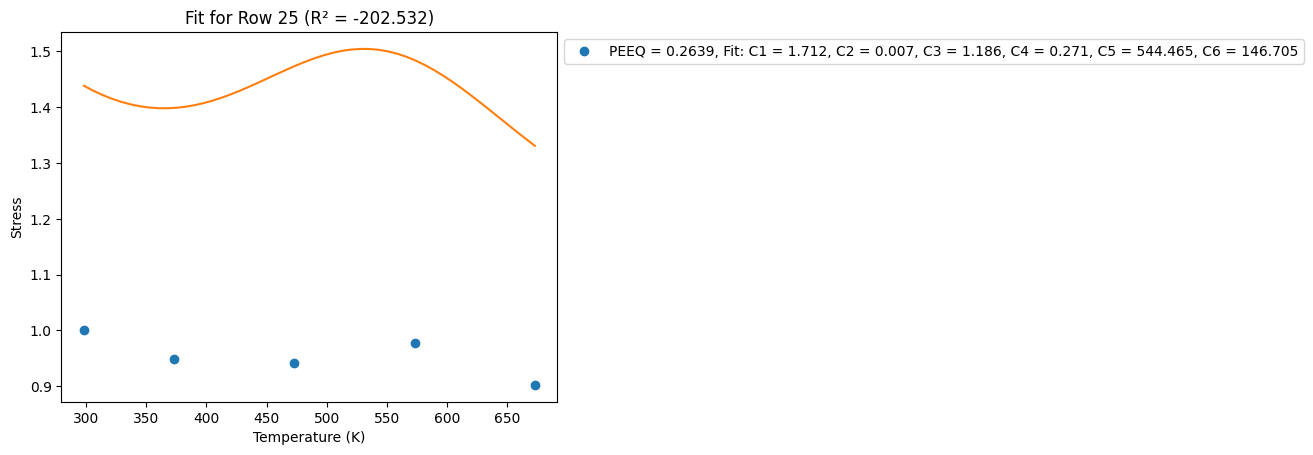

[1.         0.949327   0.94361393 0.97804256 0.90231325]


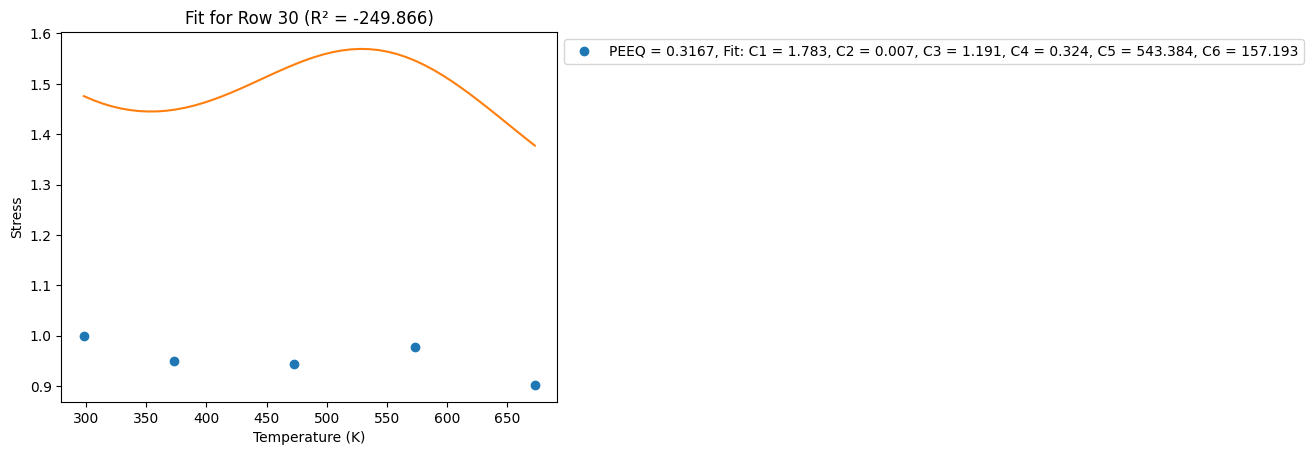

[1.         0.94991402 0.94606448 0.97888926 0.90222651]


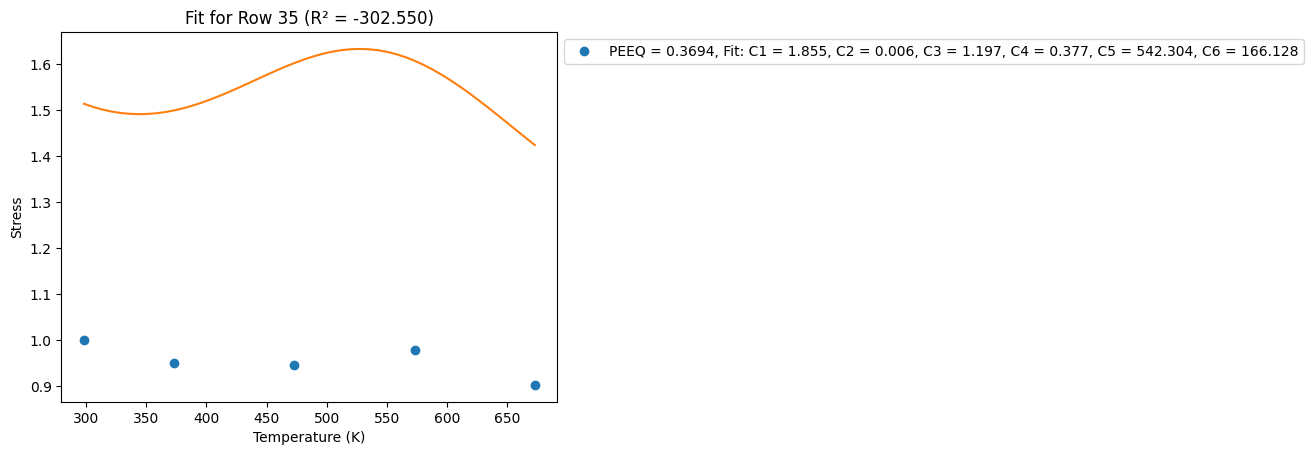

[1.         0.95055698 0.94842883 0.97970746 0.90223928]


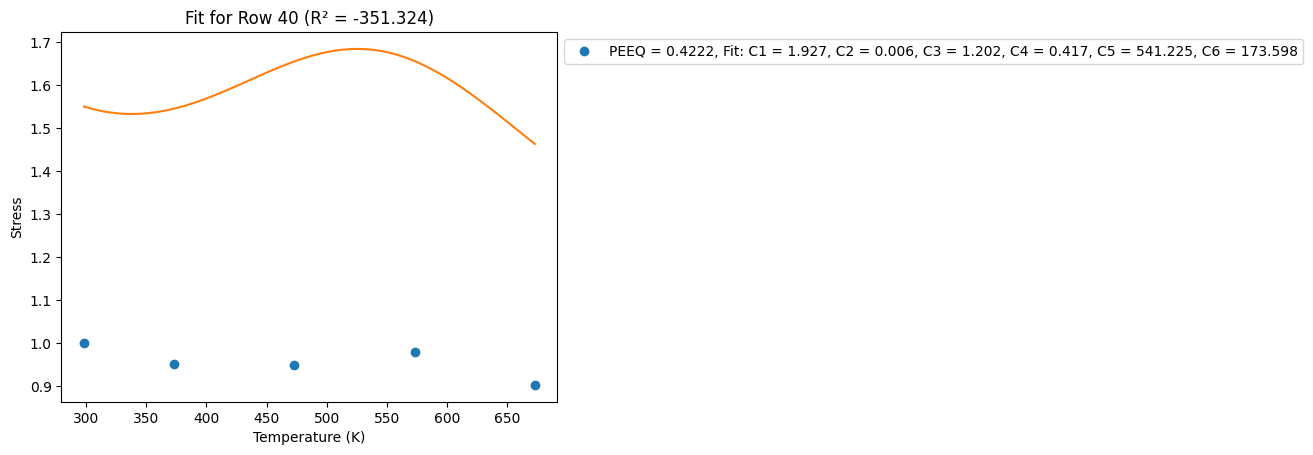

[1.         0.95123948 0.95068728 0.98053841 0.90234794]


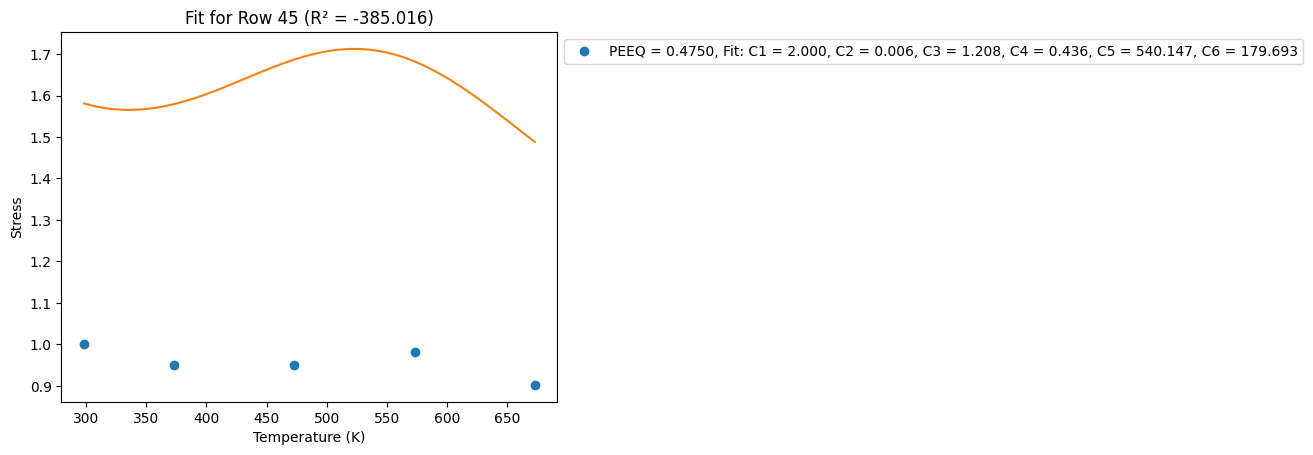

[1.         0.9519412  0.95283758 0.9813847  0.90253179]


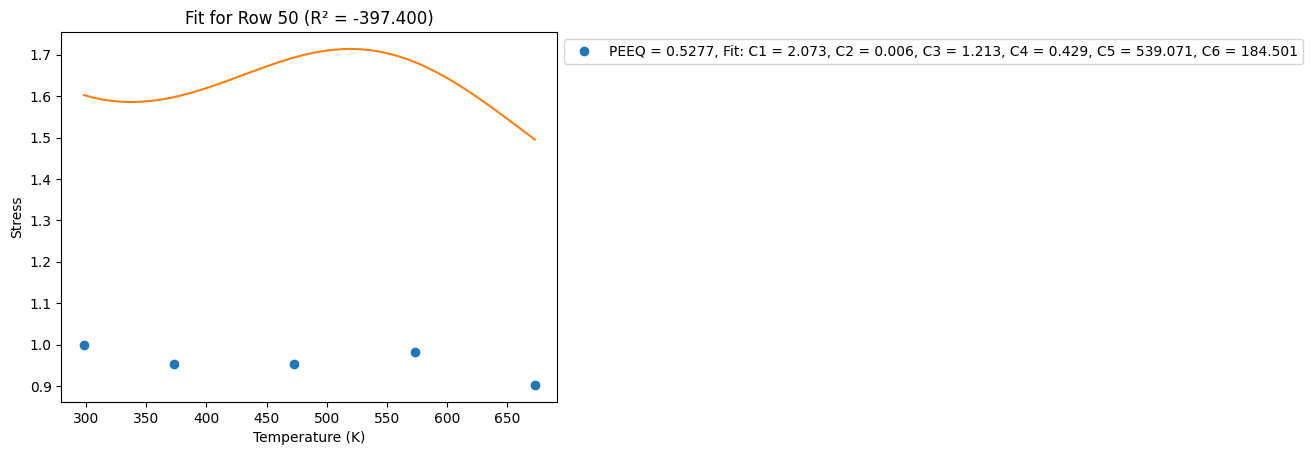

[1.         0.95844632 0.969748   0.98944001 0.9057092 ]


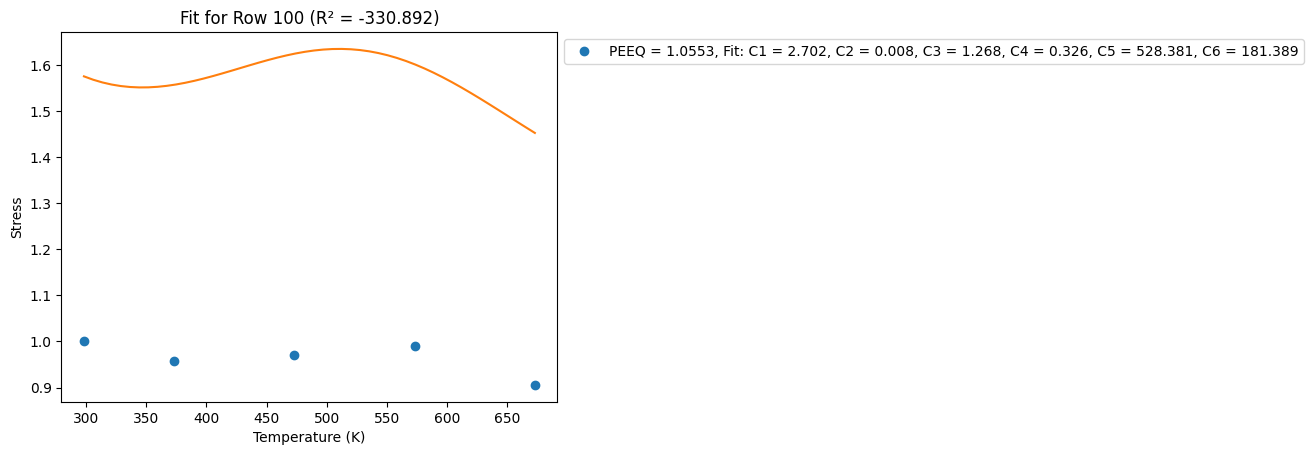

[1.         0.99756973 1.05702764 1.04110993 0.93425417]


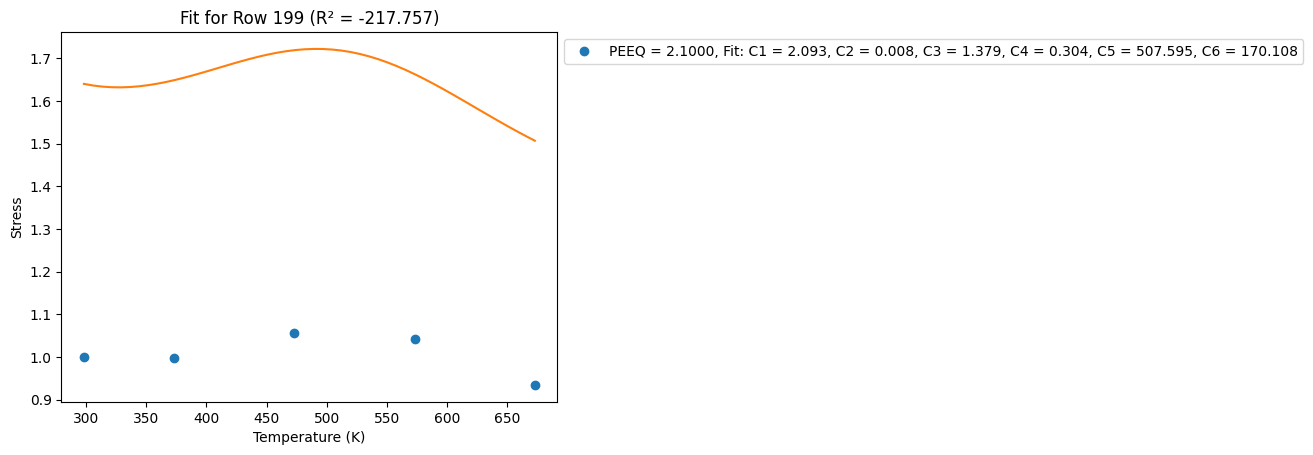

In [467]:
# Temperarute data points
T = np.array([298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.array([0, 1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 6:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)